2011-2014 IOS data for analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime

import pandas as pd
import netCDF4 as nc
import datetime
import pandas as pd
import seaborn as sns
from salishsea_tools.nowcast import figures
from salishsea_tools import viz_tools, nc_tools, tidetools
from glob import glob
#from datetime import datetime
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '25'}
title_font = {
    'fontname': 'Bitstream Vera Sans', 'size': '30', 'color': 'black',
    'weight': 'medium'
}

In [4]:
import ACTDR

In [5]:
a = ACTDR.load_dat('SOG_nancy_mod.dat')

> open  SOG_nancy_mod.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_nancy_mod.dat
> complete


In [6]:
len(ACTDR.CTD_DAT)

1529

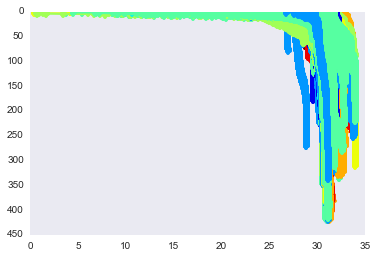

In [7]:
cmap=cm.get_cmap('jet',12)
count=0
for cast in ACTDR.CTD_DAT:
    plt.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
    count=count+1
plt.axis([0,35,450,0])
plt.grid()

In [8]:
bathyy, X, Y = tidetools.get_SS2_bathy_data()

In [9]:
def select_cast_cSog(flag, imin, imax, jmin, jmax):
    """This function was made to select 
        the cast in the different SoG region in 
        different month
        1)in all the years if flag = 1
        2)only in year 2014 if flag = 2
        3)only except year 2014 if flag = 3"""
    
    s_cast = []
    if flag ==1:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin):
                s_cast.append(cast)
    if flag ==2:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin) & \
            (cast['Year'] == 2014):
                s_cast.append(cast)
    if flag ==3:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin) & \
            (cast['Year'] < 2014):
                s_cast.append(cast)
        
    return s_cast

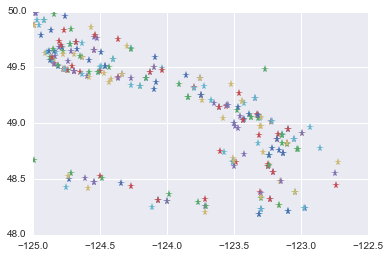

In [10]:
casts = []
for cast in ACTDR.CTD_DAT:
    year = cast['Year']
    if year > 2013:
        plt.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 8)
        #casts.append(cast['Year'])
#max(casts)

# General statistical view of data in central Sog

In [11]:
## Select central SoG data
sog_data = select_cast_cSog(1,240, 350, 390, 450)

In [12]:
sog = pd.DataFrame(sog_data)

In [13]:
max_year = sog['Year'].max()
max_year

2014

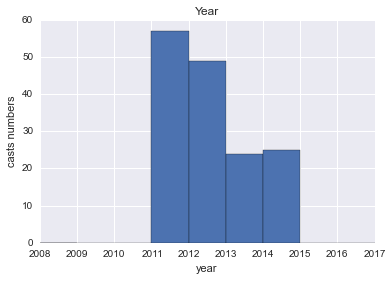

In [14]:
max_year = sog['Year'].max()
min_year = sog['Year'].min()
sog.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

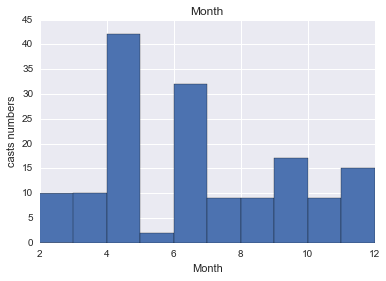

In [15]:
sog.hist('Month')
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

In [16]:
def select_cast_month_more(flag, imin, imax, jmin, jmax, Month):
    """This function was made to select 
        the cast in the SoG region in the
        specific month """
    
    s_cast = []
    if flag ==1:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin)  & (cast['Month'] == Month):
                s_cast.append(cast)
    if flag ==2:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin)  & \
            (cast['Year'] == 2014) & (cast['Month'] == Month):
                s_cast.append(cast)
    if flag ==3:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin)  & \
            (cast['Year'] < 2014) & (cast['Month'] == Month):
                s_cast.append(cast)
    return s_cast

In [17]:
def select_cast_contimonth(s_cast, Month):
    """This function was made continuously with function select_cast_
        cSog()to select month based on that"""
    ss_cast = []
    for cast in s_cast:
        if cast['Month'] == Month:
            ss_cast.append(cast)
    return ss_cast

In [18]:
def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])

In [19]:
def compare_cast_SoG_zoomin(flag, imin,imax,jmin,jmax,Month,num):
    month = {'1':{'name': 'Jan'},'2':{'name': 'Feb'},\
    '3':{'name': 'Mar'}, '4':{'name': 'Apr'},'5':{'name': 'May'},\
    '6':{'name': 'Jun'},'7':{'name': 'Jul'},'8':{'name': 'Aug'},\
    '9':{'name': 'Sep'}, '10':{'name': 'Oct'}, '11':{'name': 'Nov'},\
    '12':{'name': 'Dec'}}
    results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
    fig,axs=plt.subplots(1,4,figsize=(50,15))
    #map
    ax=axs[0]
    grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
    lons = grid.variables['nav_lon']
    lats = grid.variables['nav_lat']
    #s_cast = select_cast_cSog(flag, imin, imax, jmin, jmax)
    s_cast = select_cast_month_more(flag, imin, imax, jmin, jmax, Month)
    for cast in s_cast:
        sites, =ax.plot(cast['Longitude'],cast['Latitude'],'DodgerBlue',marker='.', label = 'sites')
        ax.legend([sites],['sites'],loc = 1, fontsize = 25)

    viz_tools.plot_coastline(ax, grid, coords = 'map')
    ax.plot(lons[jmin, imin:imax,],lats[jmin, imin:imax],'r-')
    ax.plot(lons[jmax, imin:imax,],lats[jmax, imin:imax,],'r-')
    ax.plot(lons[ jmin:jmax, imin],lats[jmin:jmax, imin],'r-')
    ax.plot(lons[jmin:jmax, imax],lats[jmin:jmax, imax],'r-')    
    ax.set_xlim([-125.5,-122])
    ax.set_ylim([48.5,50.5])
    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    ax.set_xlabel('Longitude', **axis_font)
    ax.set_ylabel('Latitude', **axis_font)    
    count = 0
    ##prepare nowcasts results
    for cast in s_cast:
        if Month >= 10:
            run_date = datetime.datetime(2014, Month,cast['Day'])
        else:
            run_date = datetime.datetime(2015, Month,cast['Day'])
        # Results dataset location
        results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())
        grid_T_hr = results_dataset('1d', 'grid_T', results_dir)
        sal_hr = grid_T_hr.variables['vosaline']
        depth = grid_T_hr.variables['deptht']
        bathyy, X, Y = tidetools.get_SS2_bathy_data()
        [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
        cast['Latitude'],X,Y,bathyy)
        sal_hr = np.ma.masked_values(sal_hr[0,:,x1,y1], 0)
        ax = axs[1]
        modd, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*')
        ##profile comparison          
        obss, =ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen',marker='o')
        count=count+1
        ax.axis([0,35,400,0])
        ax.grid('on')   
        ax.set_title('Comparison in '+ str(month[num]['name']), **title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.legend([modd,obss],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[2]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*')
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o')
        ax.set_xlim(0, 35)
        ax.set_ylim(80, 0)
        ax.set_title('Zoom in top 80m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[3]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*')
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o')
        ax.set_xlim(0, 35)
        ax.set_ylim(20, 0)
        ax.set_title('Zoom in top 20m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
              
    return fig

In [20]:
def compare_cast_SoG_zoomin_more(sog,Month, flag, imin,imax,jmin,jmax,num):
    """This function was made to compare climatology observed data
        with model results, zoom in top 20 m ultimately, with max, min
        mean of observed & modelled surface salinity displaying"""
    
    month = {'1':{'name': 'Jan'},'2':{'name': 'Feb'},\
    '3':{'name': 'Mar'}, '4':{'name': 'Apr'},'5':{'name': 'May'},\
    '6':{'name': 'Jun'},'7':{'name': 'Jul'},'8':{'name': 'Aug'},\
    '9':{'name': 'Sep'}, '10':{'name': 'Oct'}, '11':{'name': 'Nov'},\
    '12':{'name': 'Dec'}}
    max_obs_surface = []
    min_obs_surface = []
    max_mod_surface = []
    min_mod_surface = []
    sog_month = sog[sog['Month']== Month]
    dep = sog_month['Depth']
    sal = sog_month['Salinity']
    if max(dep)[0] <5: ##surface depth maximum 5m
        max_obs_surface.append(max(sal)[0])
        min_obs_surface.append(min(sal)[0])
    results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
    fig,axs=plt.subplots(1,4,figsize=(60,20))
    #map
    ax=axs[0]
    grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
    lons = grid.variables['nav_lon']
    lats = grid.variables['nav_lat']
    #s_cast = select_cast_month_more(imin, imax, jmin, jmax,Month)
    s_cast = select_cast_cSog(flag, imin, imax, jmin, jmax)
    ss_cast = select_cast_contimonth(s_cast, Month)
    for cast in ss_cast:
        if Month != 3:
            sites, =ax.plot(cast['Longitude'],cast['Latitude'],'DodgerBlue',marker='*',\
            markersize=20, label = 'sites')
            ax.legend([sites],['sites'],loc = 1, fontsize = 25)
        elif Month ==3:
            ax.plot(cast['Longitude'],cast['Latitude'],'DodgerBlue',marker='*', \
                    markersize=20, label = 'sites')
    viz_tools.plot_coastline(ax, grid, coords = 'map')
    ax.plot(lons[jmin, imin:imax,],lats[jmin, imin:imax],'r-')
    ax.plot(lons[jmax, imin:imax,],lats[jmax, imin:imax,],'r-')
    ax.plot(lons[jmin:jmax, imin],lats[jmin:jmax, imin],'r-')
    ax.plot(lons[jmin:jmax, imax],lats[jmin:jmax, imax],'r-')    
    ax.set_xlim([-124.,-122.8])
    ax.set_ylim([48.6,49.3])
    ax.set_xlabel('Longitude', **axis_font)
    ax.set_ylabel('Latitude', **axis_font)
    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    count = 0
    ##prepare nowcasts results
    for cast in ss_cast:
        if Month >= 10:
            run_date = datetime.datetime(2014, Month,cast['Day'])
        else:
            run_date = datetime.datetime(2015, Month,cast['Day'])
        # Results dataset location
        results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())
        grid_T_hr = results_dataset('1d', 'grid_T', results_dir)
        sal_hr = grid_T_hr.variables['vosaline']
        depth = grid_T_hr.variables['deptht']
        bathyy, X, Y = tidetools.get_SS2_bathy_data()
        [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
        cast['Latitude'],X,Y,bathyy)
        sal_hr = np.ma.masked_values(sal_hr[0,:,x1,y1], 0)
        max_mod_surface.append(np.nanmax(sal_hr[2:4])) ##find max and min of 2.5-3.5m
        min_mod_surface.append(np.nanmin(sal_hr[2:4]))
        ax = axs[1]
        modd, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*',\
                       markersize = 8, linewidth=5.0)
        ##profile comparison          
        obss, =ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen',marker='o',\
        markersize = 8, linewidth=5.0)
        count=count+1
        ax.axis([0,35,400,0])
        ax.grid('on')   
        ax.set_title('Comparison in '+ str(month[num]['name']), **title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.legend([modd,obss],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[2]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*',markersize = 8, linewidth=5.0)
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o',\
                      markersize = 8, linewidth=5.0)
        ax.set_xlim(0, 35)
        ax.set_ylim(80, 0)
        ax.set_title('Zoom in top 80m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[3]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*',\
                      markersize = 8, linewidth=5.0)
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o',\
                      markersize = 8, linewidth=5.0)
        ax.set_xlim(0, 35)
        ax.set_ylim(20, 0)
        ax.set_title('Zoom in top 20m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
    max_mod_max = np.nanmax(max_mod_surface)
    min_mod_min = np.nanmin(min_mod_surface)
    #axs[2].text( 0, 18,'Obs mean of surface {0:.4}'.format(max_obs_surface[0]),\
           #fontsize=35)
    #axs[2].text( 0, 18.5,'Mod mean of surface {0:.4}'.format(min_obs_surface[0]),\
           #fontsize=35)
    axs[3].text( 0, 18,'Obs max of surface {0:.4}'.format(max_obs_surface[0]),\
           fontsize=35)
    axs[3].text( 0, 18.5,'Obs min of surface {0:.4}'.format(min_obs_surface[0]),\
           fontsize=35)
    axs[3].text( 0, 19,'Mod max of surface {0:.4}'.format(max_mod_max),\
           fontsize=35)
    axs[3].text( 0, 19.5,'Mod min of surface {0:.4}'.format(min_mod_min),\
           fontsize=35)
                
    return fig

# Data group by month except year 2014(with nowcasts)

In [21]:
## flag = 3, exclude year 2014
sog_data = select_cast_cSog(3,240, 350, 390, 450)
sogg = pd.DataFrame(sog_data)

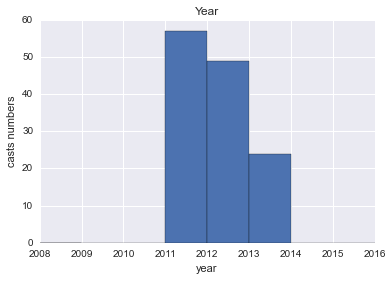

In [22]:
max_year = sogg['Year'].max()
min_year = sogg['Year'].min()
sogg.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

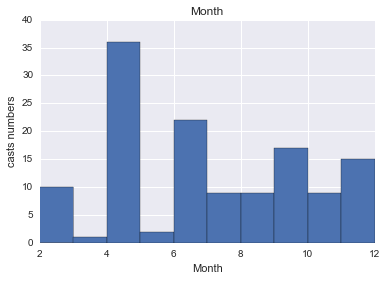

In [23]:
sogg.hist('Month')
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

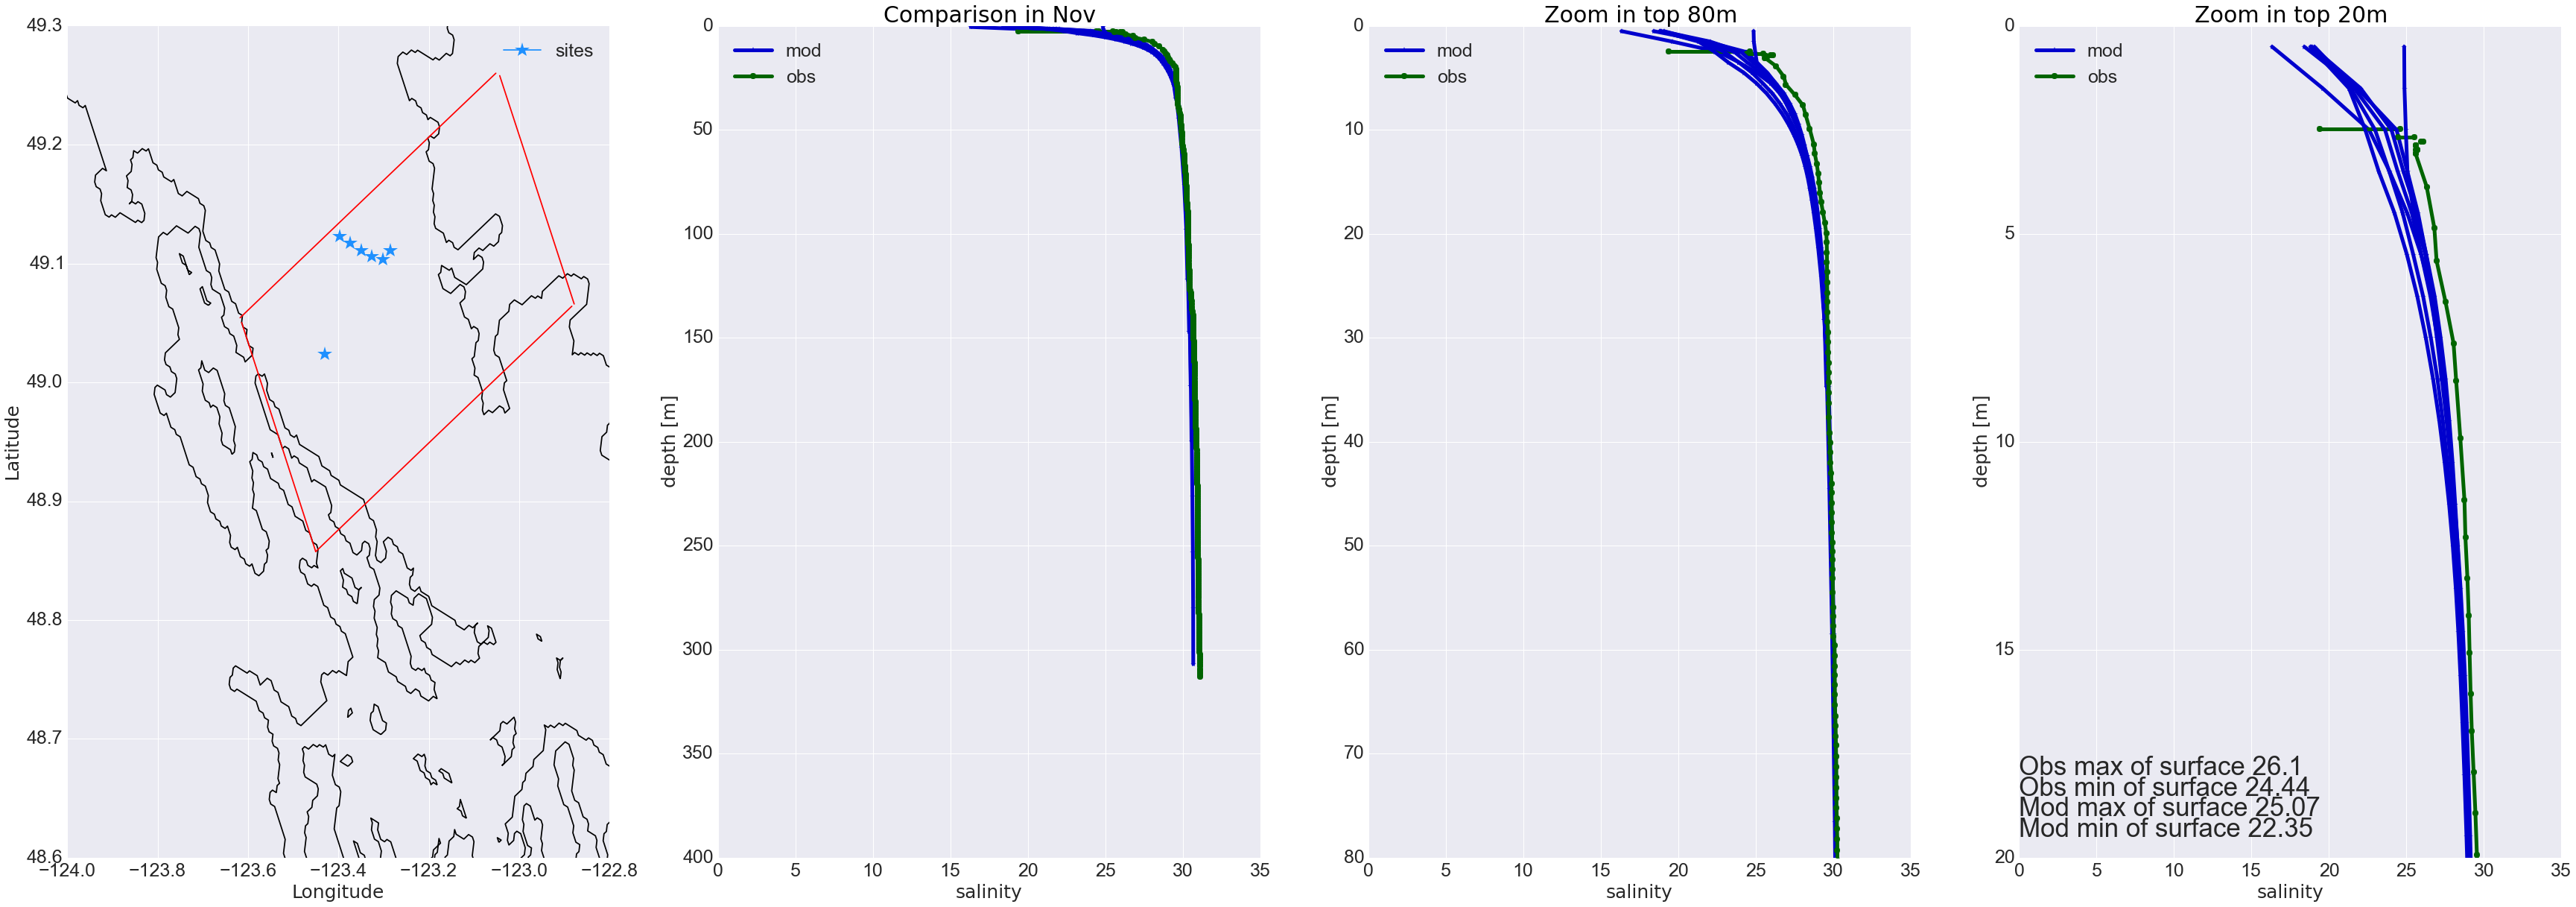

In [24]:
## Nov
fig = compare_cast_SoG_zoomin_more(sogg, 11,3, 240, 350, 390, 440, '11')

* Obs in Nov are all year 2011. Surface depths for obs are between[2.5m, 3.0m]. Our model is 2-3 psu fresher than obs within that depth. River discharge in 2011 in Nov ranges between[1200, 2000], discharge in 2014 from Mark's data ranges [1725, 3653]. Could 1000 cubic meter cause 2-3 psu changes??

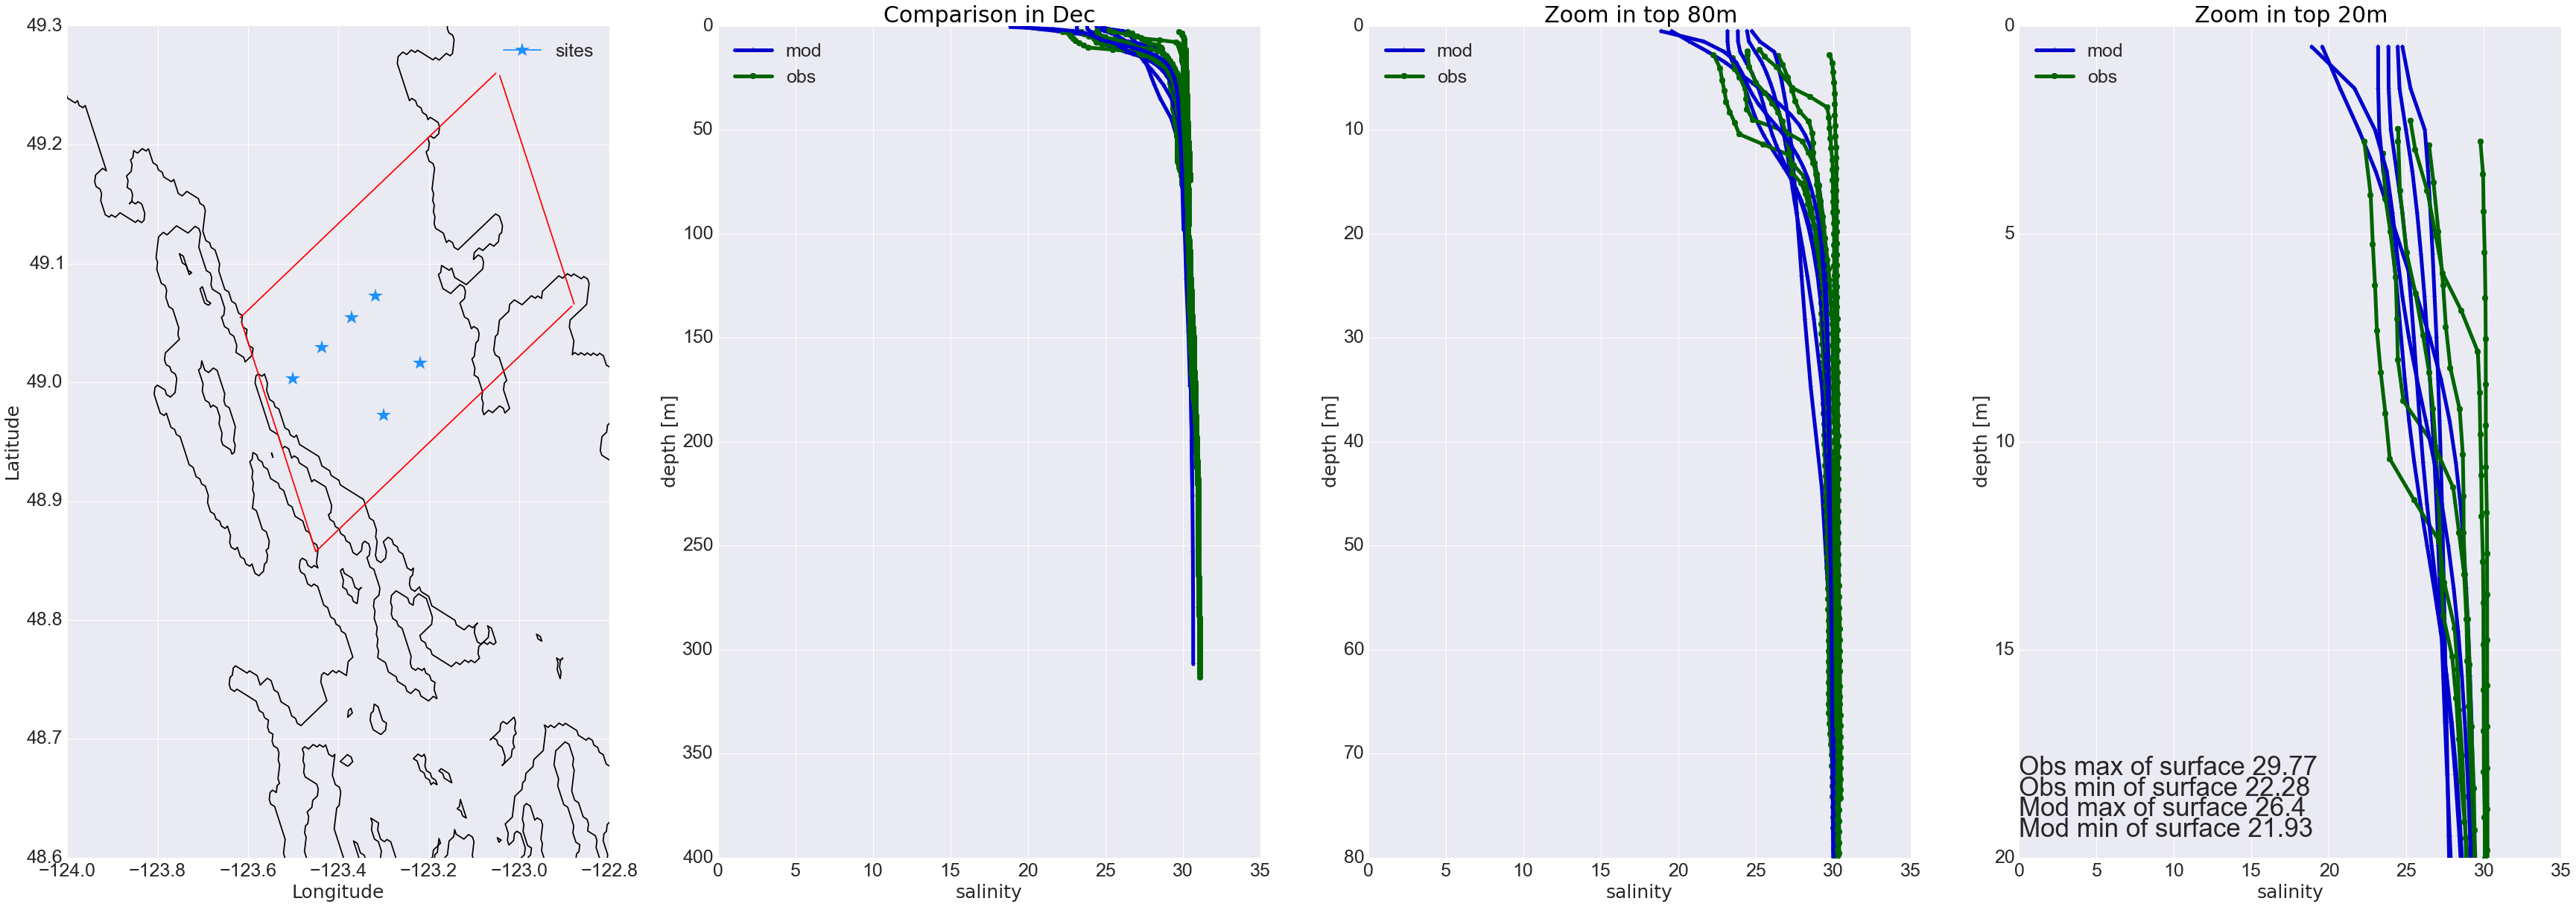

In [25]:
## Dec
fig = compare_cast_SoG_zoomin_more(sogg, 12, 3, 240, 350, 390, 440,'12')

* Ocs in Dec are all in year 2011. Surface depths for obs are between[2.2m, 3m]. Our model is 1-3psu fresher than obs. Discharge in Dec 2011 ranges from [1000, 2000]. In 2014, it is from [1290, 2720], nearly equal discharge, which means our model is fresher at surface 2-3m. But in the intermediate water from 60-250m, it corresponds with obs.

* No data in January

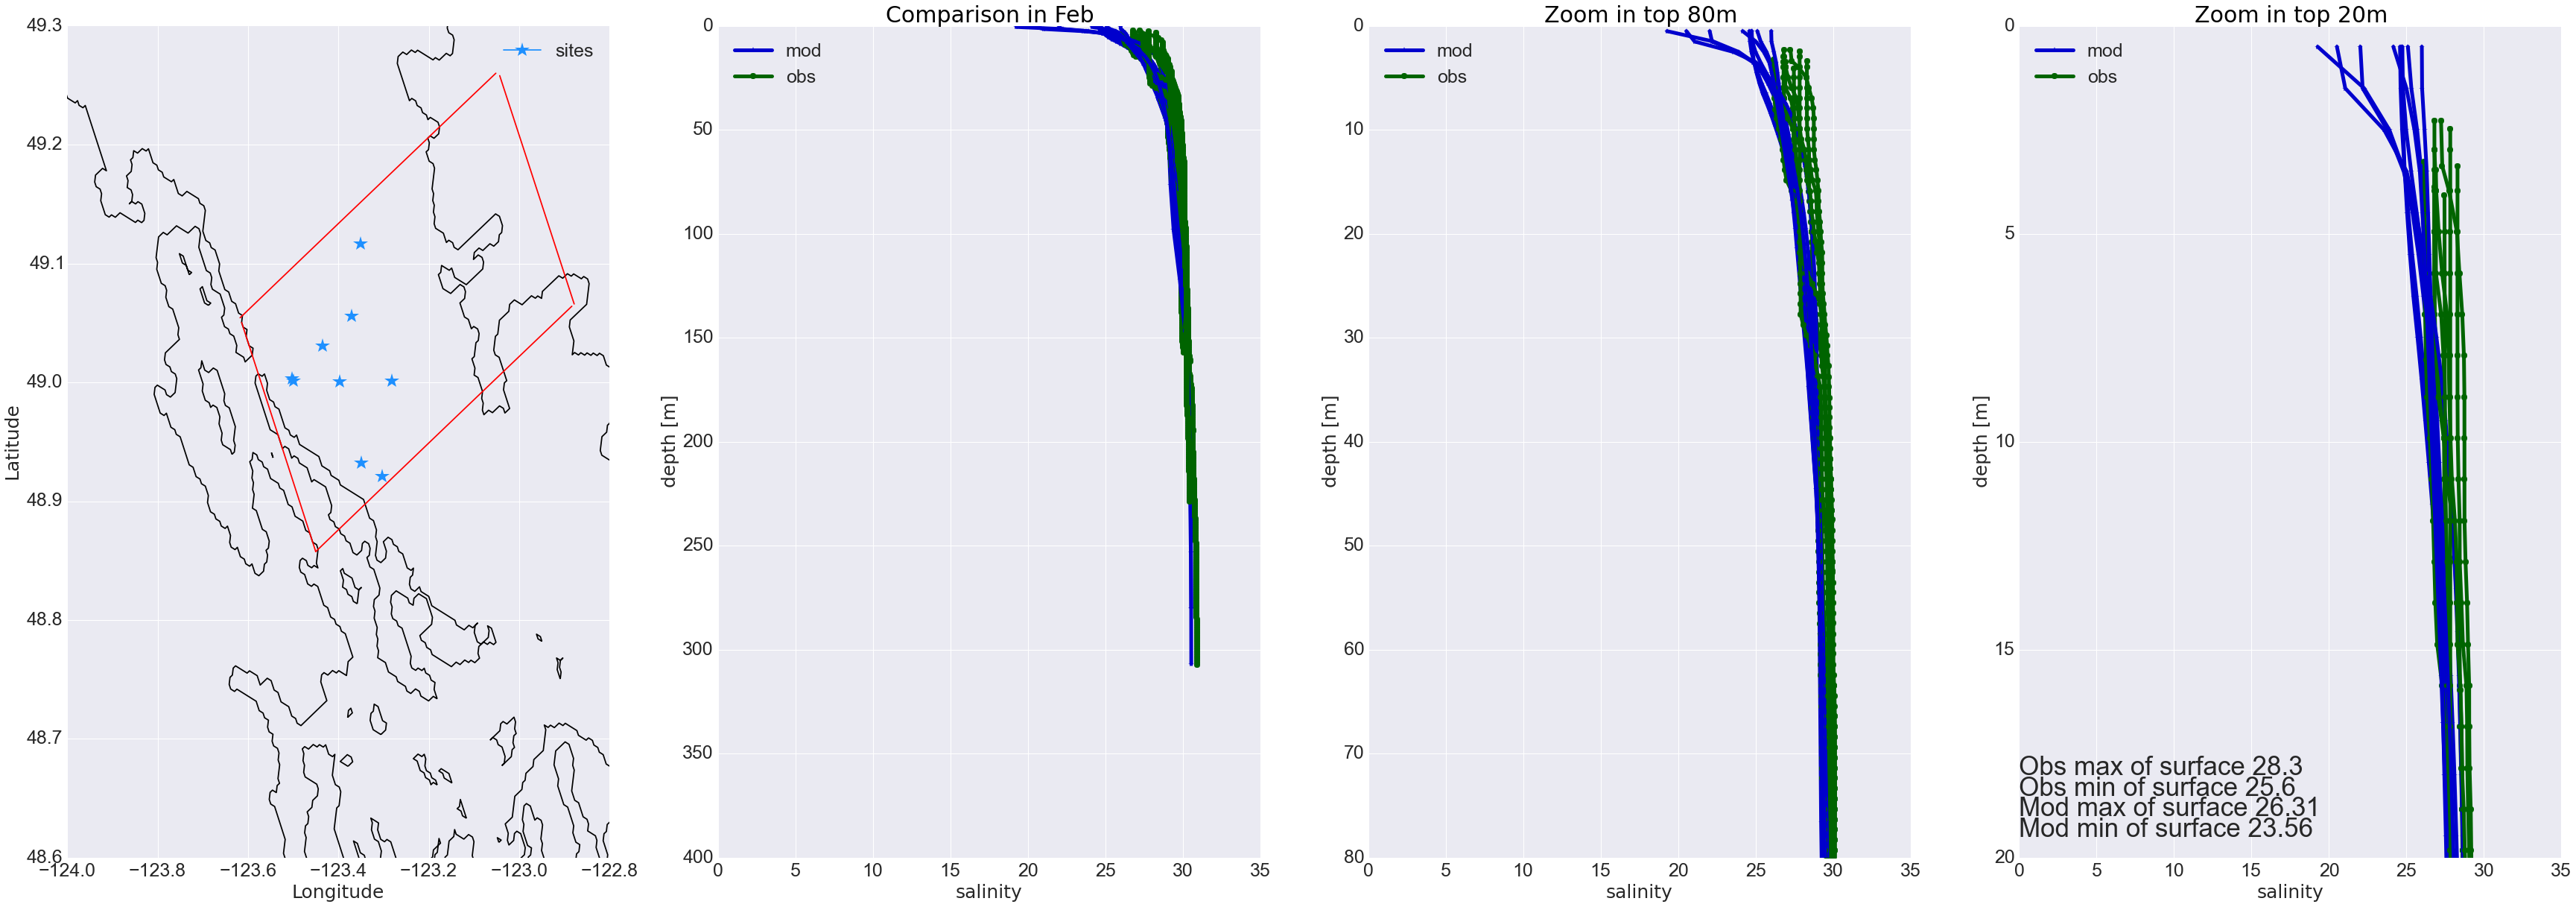

In [26]:
## Feb
fig = compare_cast_SoG_zoomin_more(sogg, 2, 3, 240, 350, 390, 440, '2')

* Casts in Feb are towed in 2011 and 2012. Surface depths of obs ranges[2.2m ,4m]. Our model is 2 psu fresher than obs, discharge in 2011 & 2012 is around 1000, in 2015 it ranges [1700, 2900], which is 700~2000 volumn higher than previous year, could this demonstrate our model fresh or not?? Intermediate water between [150m, 250m] corresponds well. Deep water still fresher. 

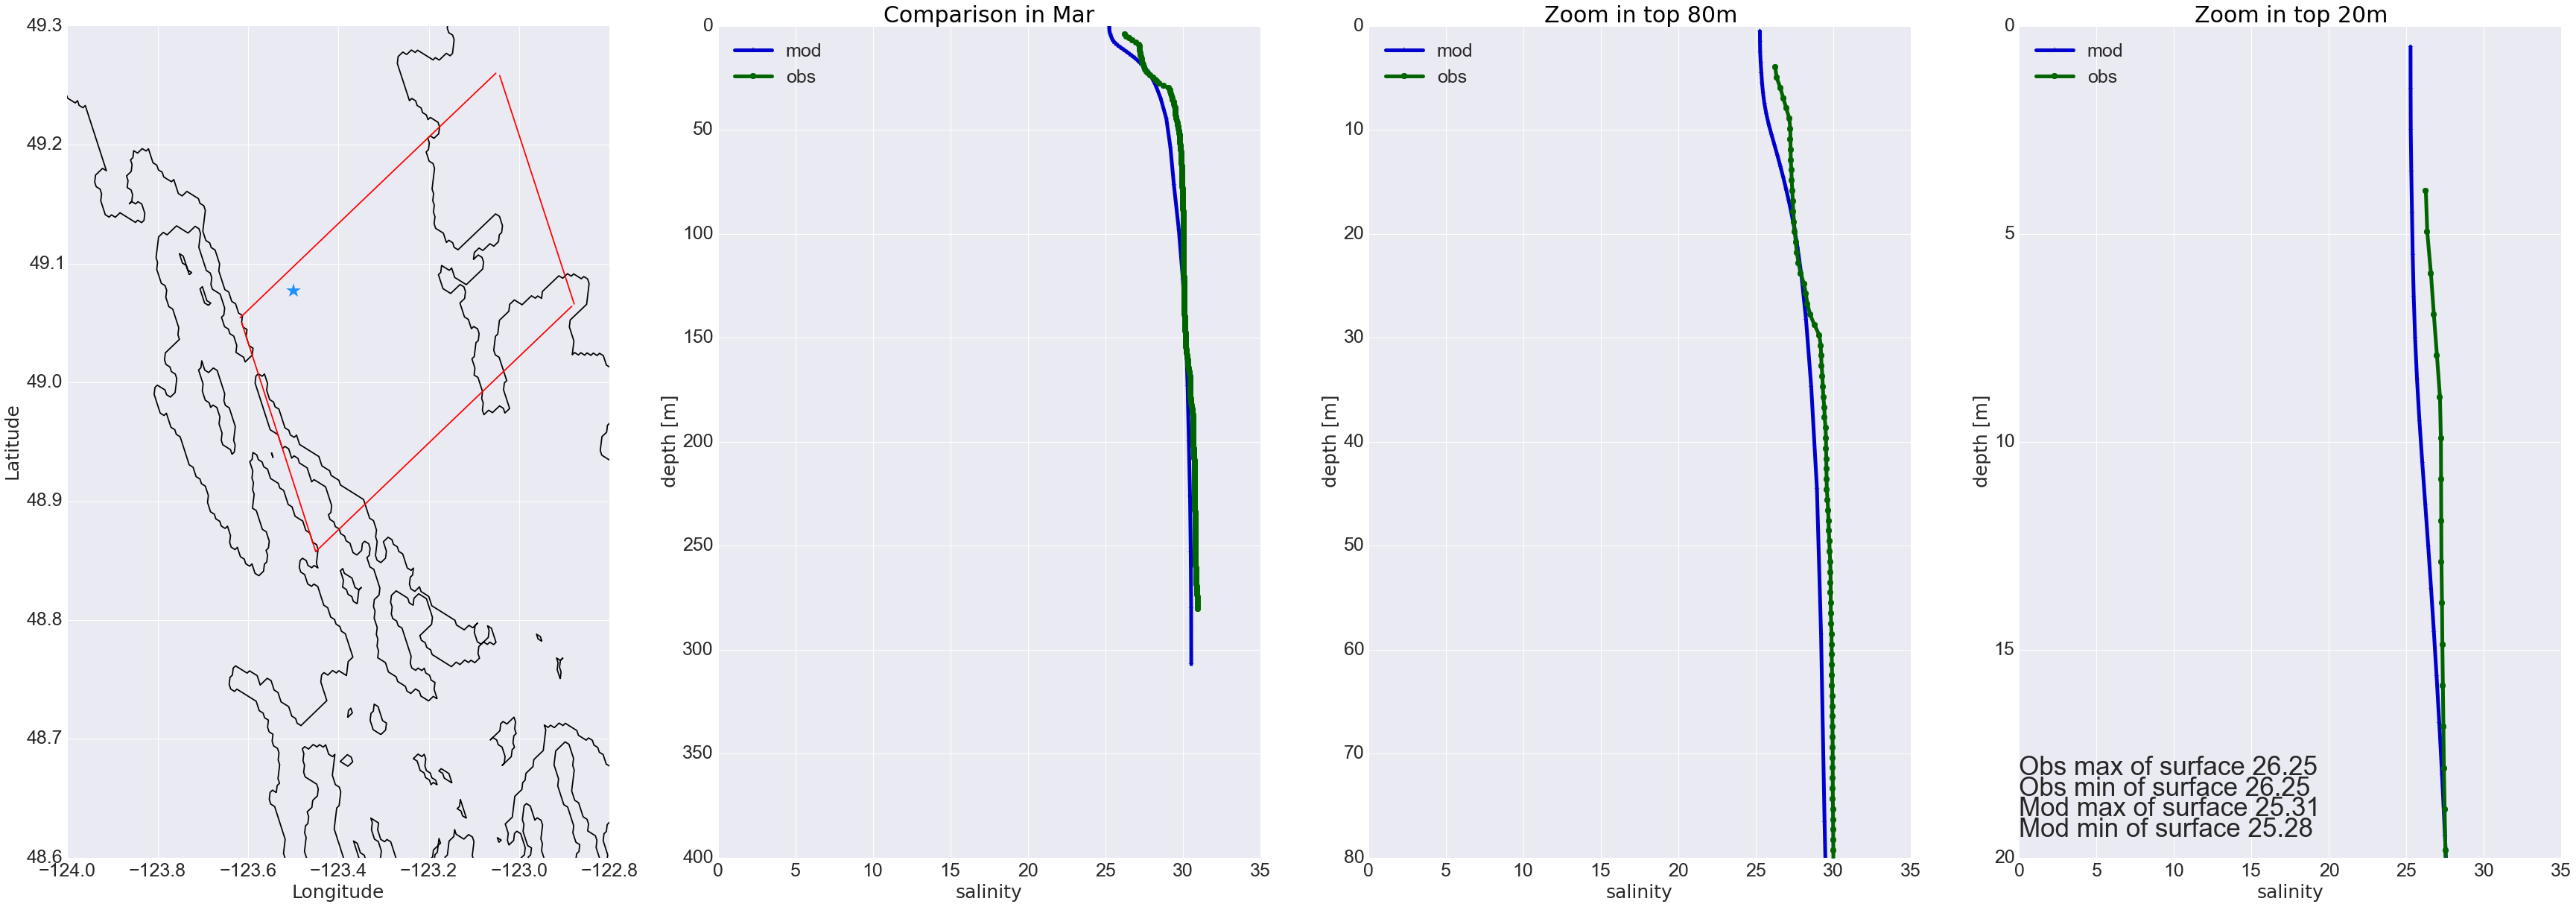

In [27]:
##March
fig = compare_cast_SoG_zoomin_more(sogg, 3, 3, 240, 350, 390, 440, '3')

* From Mark's data, discharge in Mar in 2013 ranges [756, 1228], in 2015, it is much higher [1500, 5000]. Surface depth is 4m, salinity discrepency at the surface is 1 psu, not that much, maybe too far from the river mouth?

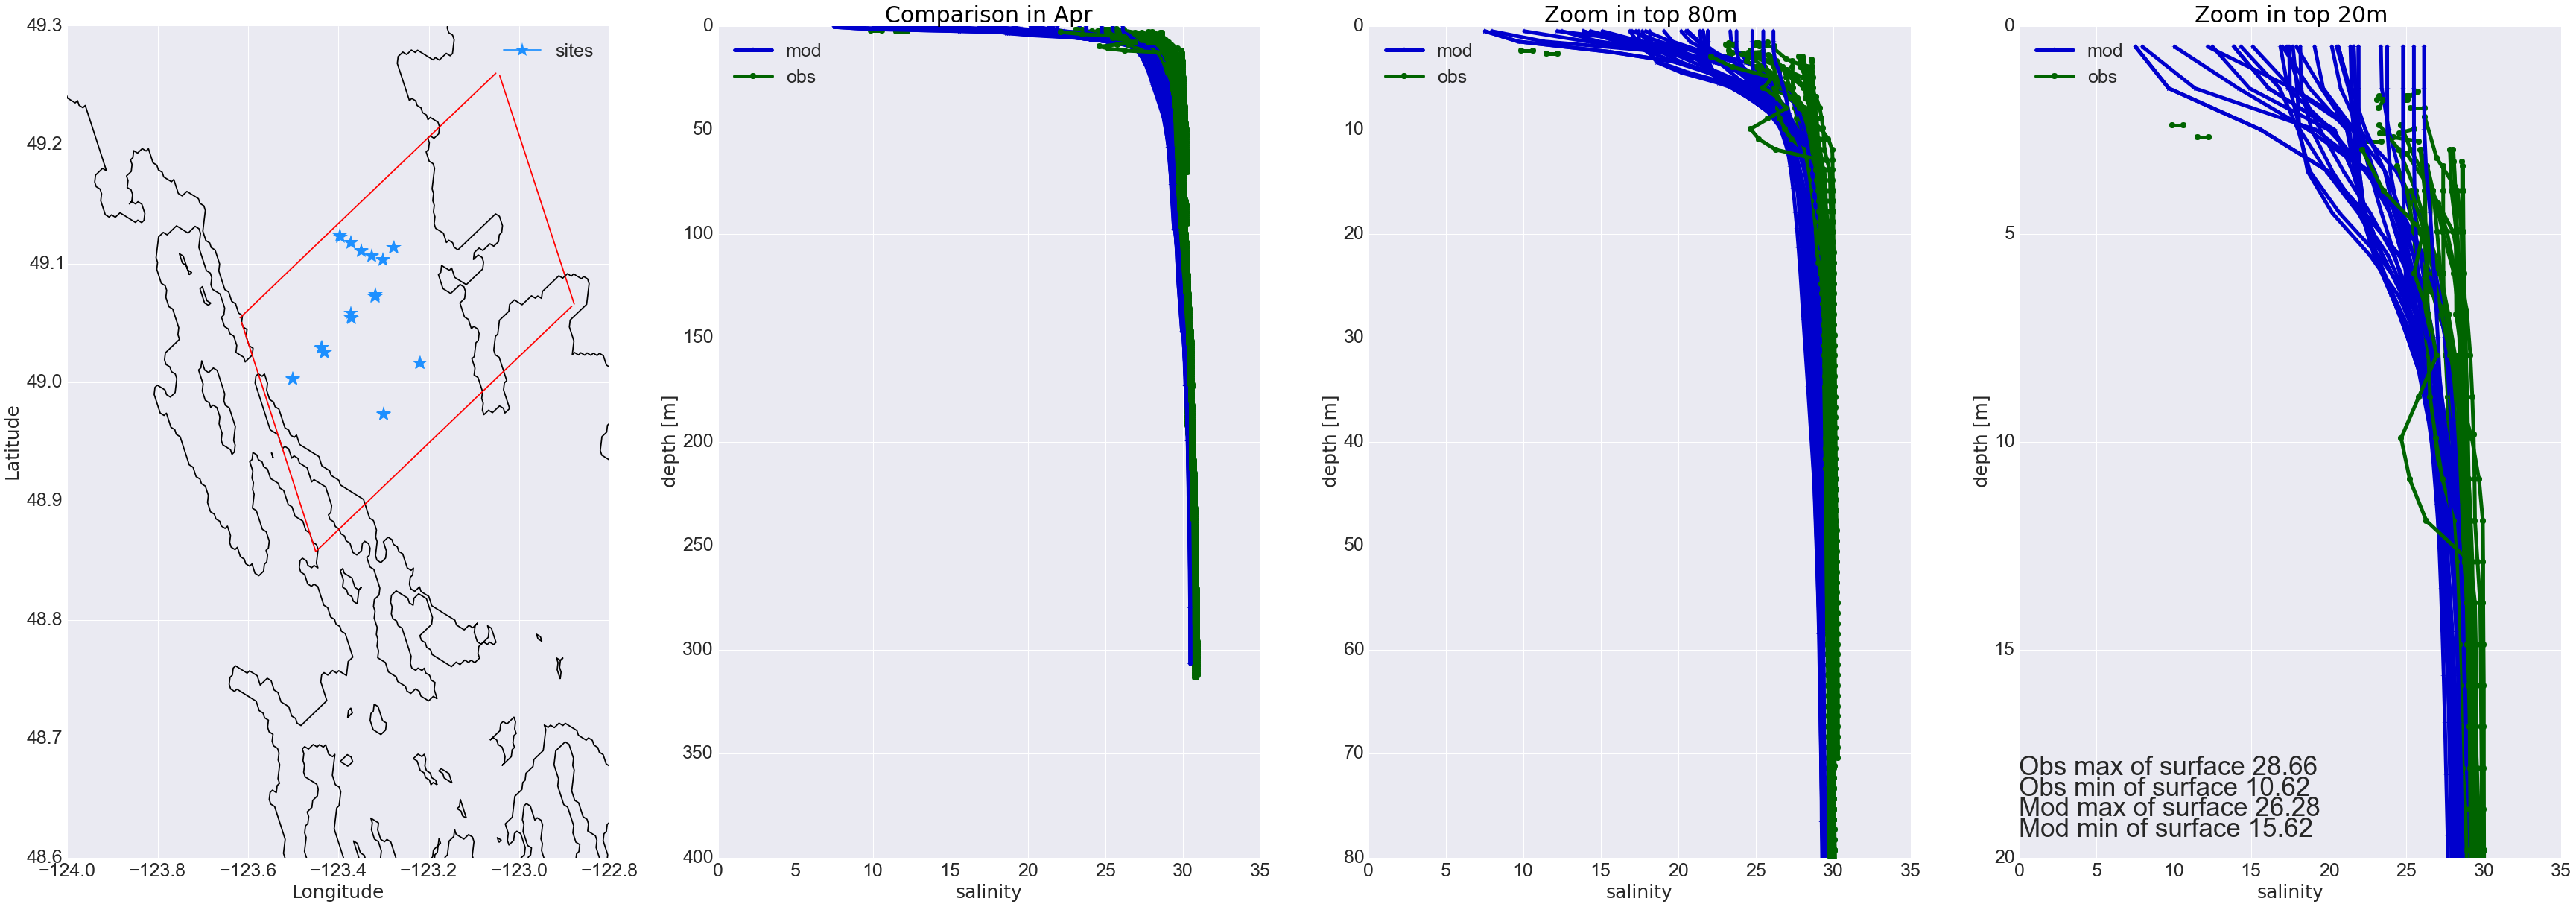

In [28]:
##April
fig = compare_cast_SoG_zoomin_more(sogg,4, 3, 240, 350, 390, 440,'4')

* Casts in Apr are from 2011,2012 and 2013. Surface depths ranges [1.7m, 4.2m].??? Need to separate these years??

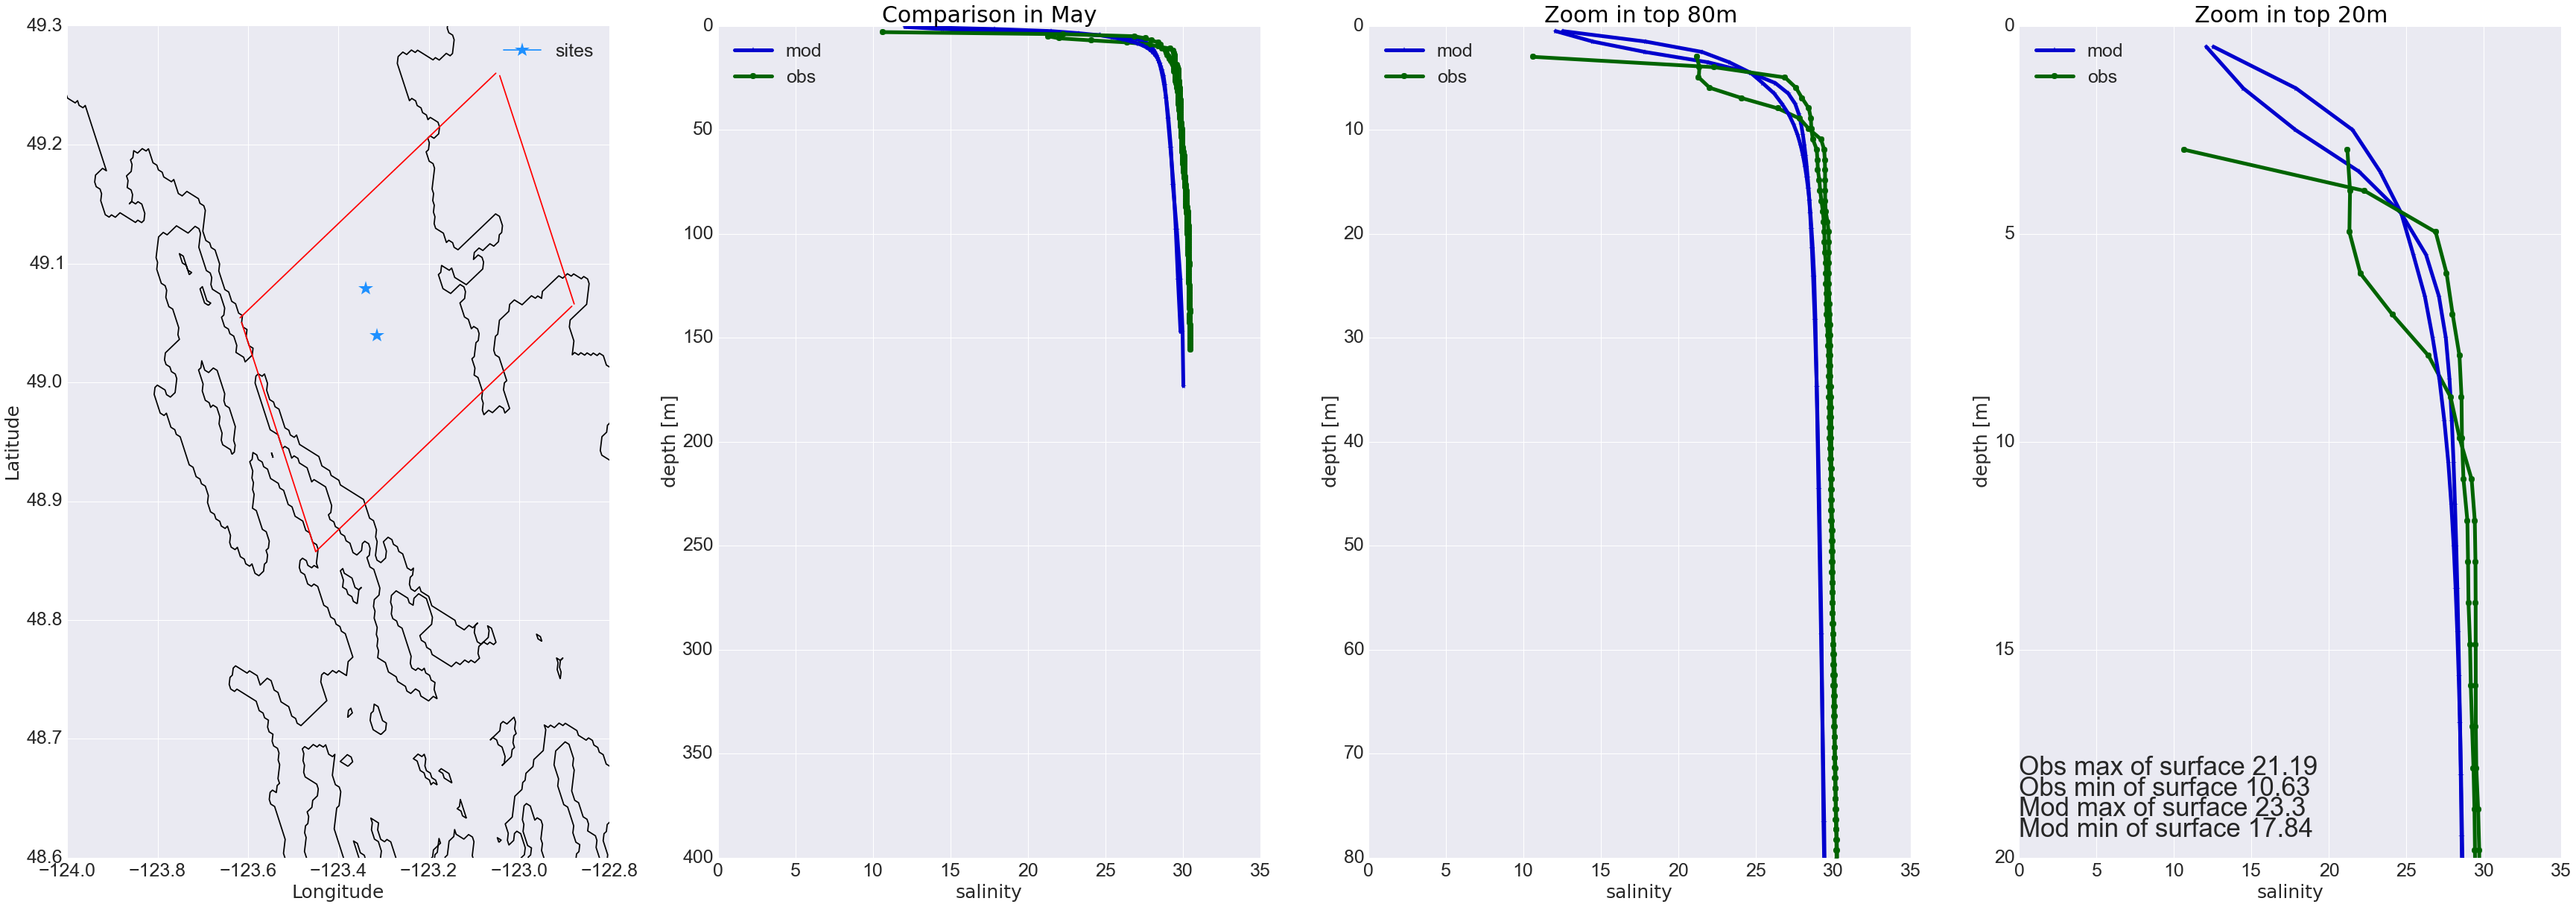

In [29]:
## May
fig = compare_cast_SoG_zoomin_more(sogg, 5, 3, 240, 350, 390, 440, '5')

* Discharge in 2013 in May ranges [3630, 10190]. In 2015, it ranges [3500, 7500]. Volumn less than 2013. Surface depth is 3m. Our model is 2-7 psu saltier than obs at surface but fresh below 10m.

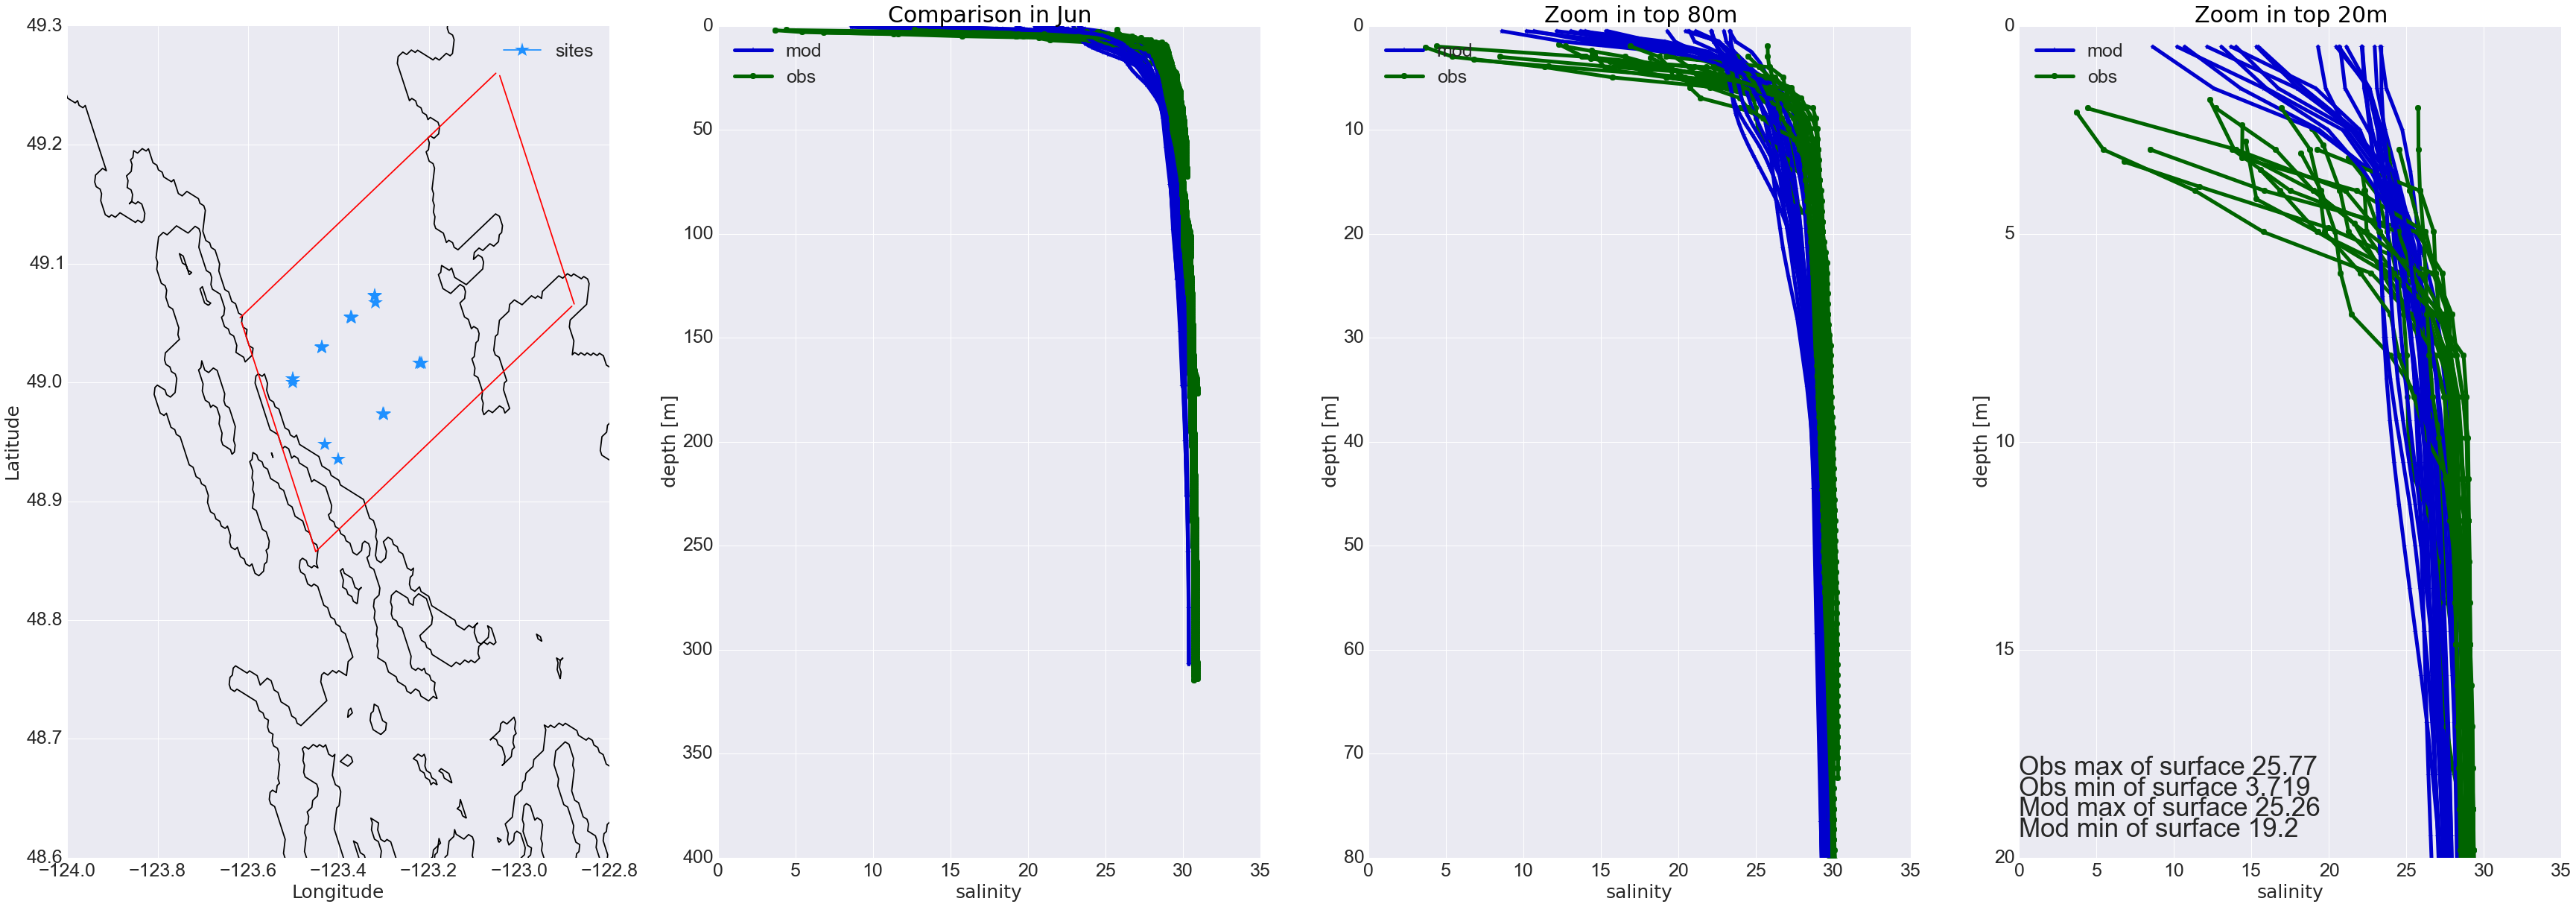

In [30]:
## June
fig = compare_cast_SoG_zoomin_more(sogg, 6, 3, 240, 350, 390, 440, '6')

* Casts are from 2011-2013. Need separate???

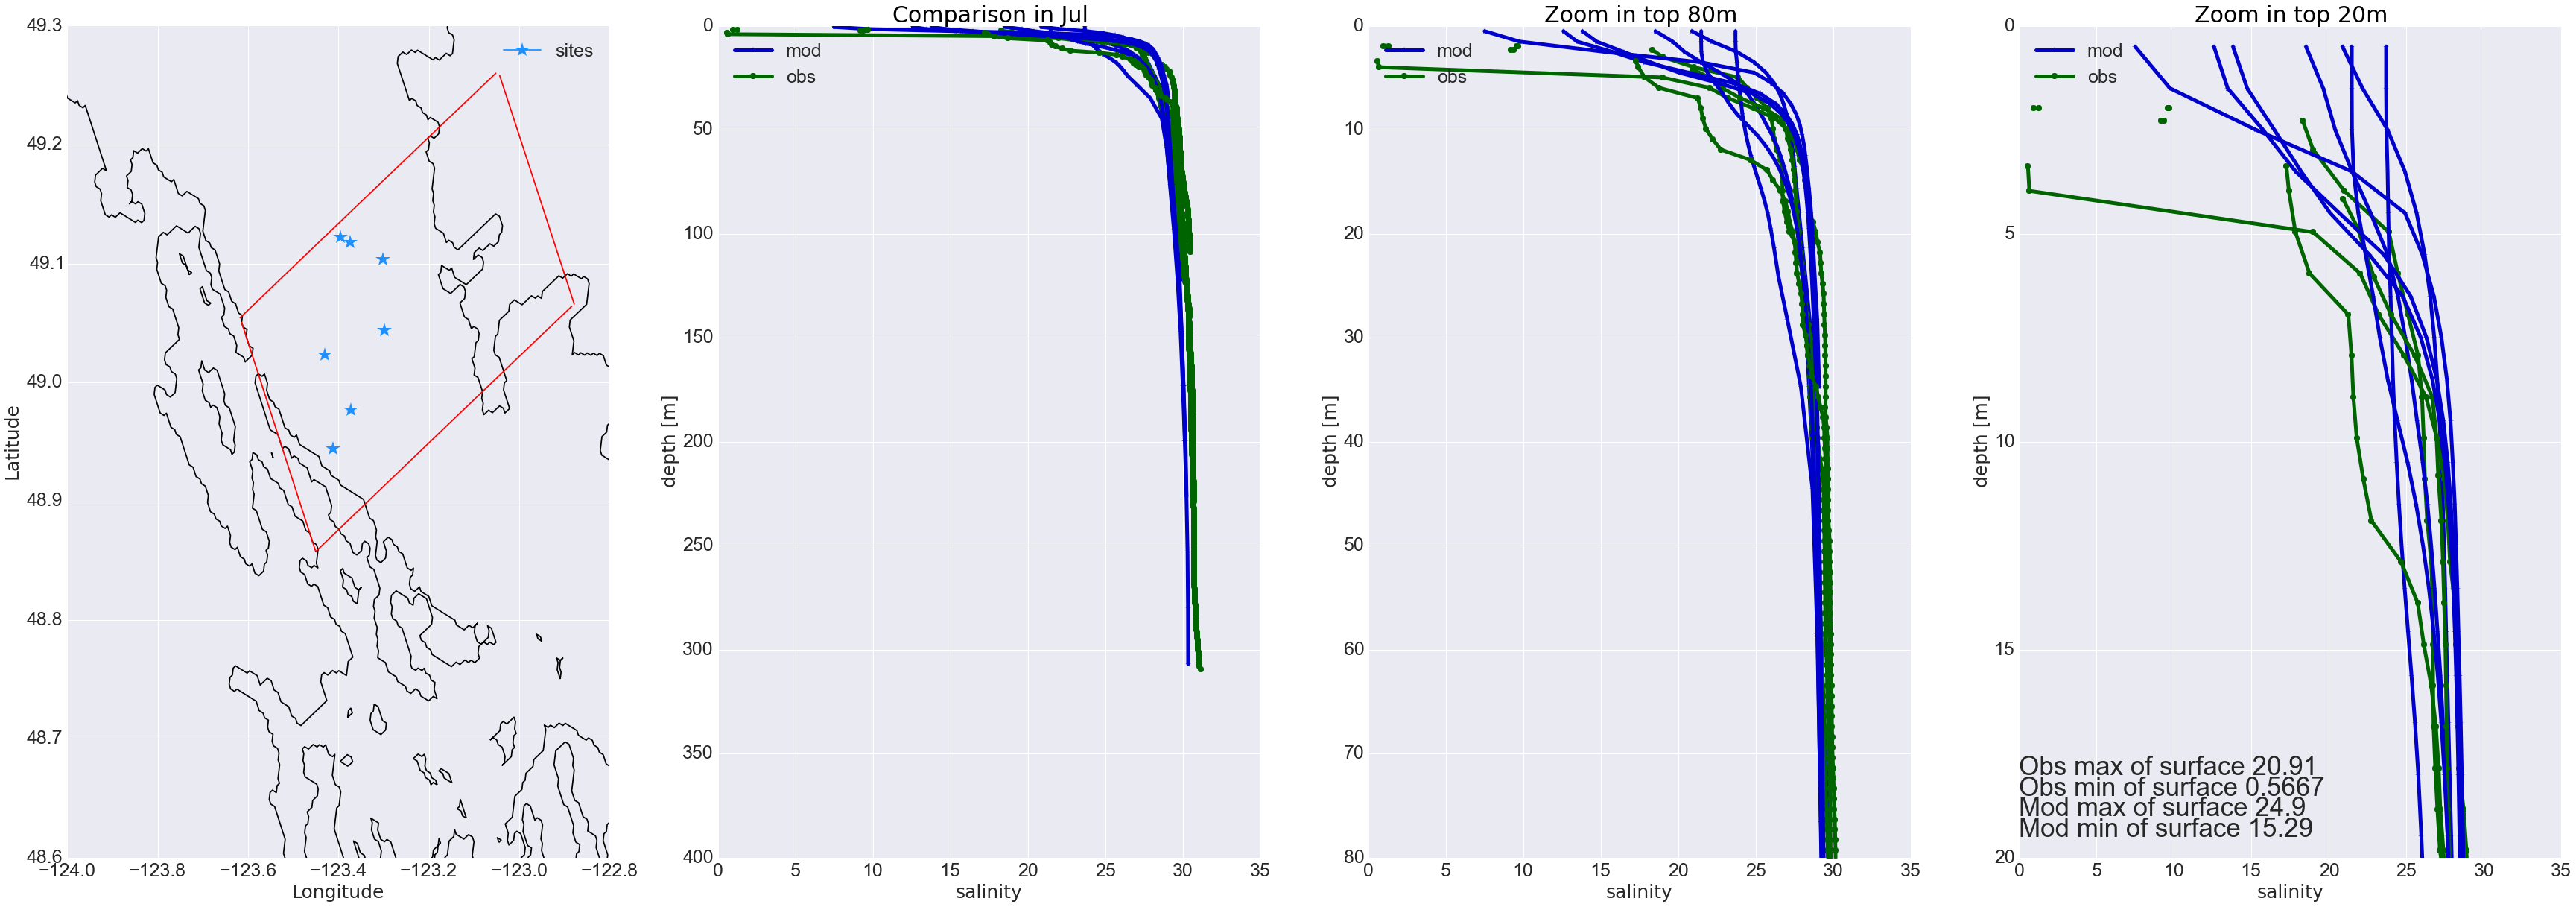

In [31]:
## July
fig = compare_cast_SoG_zoomin_more(sogg, 7, 3, 240, 350, 390, 440, '7')

* Casts are in 2012 ranges [5000, 9000], in 2015 it ranges [3000, 5000]. Surface depths are around 2-3m. Our salinity is 4-15 psu saltier than obs at surface and fresher below 40m.

* In summary, sort of hard to compare them as they are in different years, with different river dishcarge and in dfferent locations. I can only say our model nowcasts in Dec, 2014 is 1-3 psu fresher at depth 2-3m. For other months, it is hard to say because of the varing discharge. But the common feature is that no matter our model is fresher or saltier at surface depth, the intermediate water below 20m is fresher compared with obs.

# Read Mark's Fraser discharge in year 2013 & 2014

In [43]:
from scipy import interpolate as interp
from datetime import datetime, timedelta## this "from.. import" will affect plots in 2014
## so run this section at last!!!
import scipy.io as sio

In [44]:
fraser = sio.loadmat('/ocean/jieliu/research/meopar/river-discharge/fraser_flow_hope.mat') 

In [45]:
flow = fraser['flow']
time = fraser['ftime']
cc =np.float(time[0,1])
#flow[0,1]

In [46]:
def read_fraser_month(flow, time, Year, Month):
    """This function was made to extract 2014 or
        2013 fraser discharge in different month
        return time and discharge of that month
        separately"""
    flow_m = np.zeros([time.shape[1], 1])
    time_m = np.zeros([time.shape[1], 1])
    for i in np.arange(0, time.shape[1]):
        matlab_datenum = np.float(time[0,i])
        python_datetime = datetime.fromordinal(int(matlab_datenum))\
        + timedelta(days=matlab_datenum%1) - timedelta(days = 366)
        if(python_datetime.year == Year) & (python_datetime.month == Month):
            flow_m[i] = flow[0,i]
            time_m[i] = time[0,i] 
    mask=flow_m[:,0]!=0
    flow_mm = flow_m[mask]
    time_mm = time_m[mask]
    p_d = []
    for j in time_mm:
        m_d = np.float(j[0])
        p_d.append(datetime.fromordinal(int(m_d))\
        + timedelta(days=m_d%1) - timedelta(days = 366))
    return time_mm, p_d, flow_mm

In [47]:
def plot_fraser_month(flow, time, Year, Month):
    """This function was made to extract 2014 or
        2013 fraser discharge in different month,
        return the figure of that"""
    flow_m = np.zeros([time.shape[1], 1])
    time_m = np.zeros([time.shape[1], 1])
    for i in np.arange(0, time.shape[1]):
        matlab_datenum = np.float(time[0,i])
        python_datetime = datetime.fromordinal(int(matlab_datenum))\
        + timedelta(days=matlab_datenum%1) - timedelta(days = 366)
        if(python_datetime.year == Year) & (python_datetime.month == Month):
            flow_m[i] = flow[0,i]
            time_m[i] = time[0,i] 
    mask=flow_m[:,0]!=0
    flow_mm = flow_m[mask]
    time_mm = time_m[mask]
    p_d = []
    for j in time_mm:
        m_d = np.float(j[0])
        p_d.append(datetime.fromordinal(int(m_d))\
        + timedelta(days=m_d%1) - timedelta(days = 366))
    ##define the max and min of discharge for each month
    p_dd = np.array(p_d)
    p_dd_indmax = np.nanargmax(flow_mm)## index of max discharge
    p_dd_indmin = np.nanargmin(flow_mm)## index of min discharge
    p_dd_max = p_dd[p_dd_indmax]
    p_dd_min = p_dd[p_dd_indmin]
    ## make the plot
    ax = plt.subplot(111)
    ax.plot(p_dd,flow_mm)
    ax.set_xlim([p_dd[0], p_dd[-1]])
    ax.set_xlabel('day')
    ax.set_ylabel('river discharge')
    ax.text(p_dd_max, max(flow_mm), max(flow_mm)[0])
    ax.text(p_dd_min, min(flow_mm), min(flow_mm)[0])
    ax.grid('on')
    
    return ax 

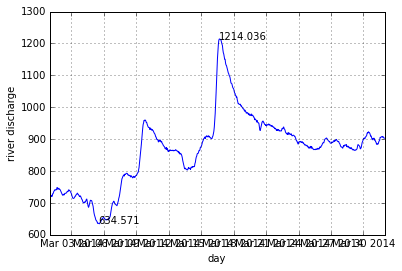

In [48]:
## Mar, 2014
ax = plot_fraser_month(flow, time, 2014, 3)

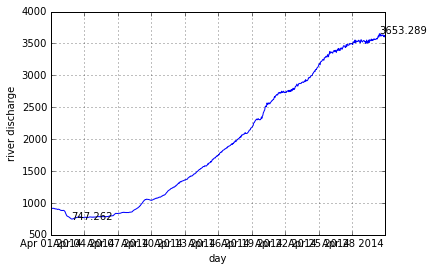

In [49]:
## Apr, 2014
ax = plot_fraser_month(flow, time, 2014, 4)

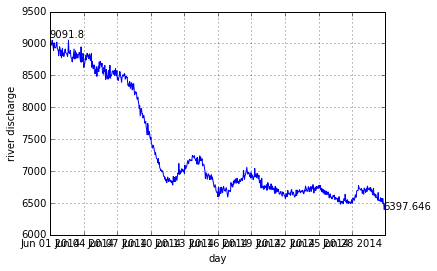

In [50]:
## Jun, 2014
ax = plot_fraser_month(flow, time, 2014, 6)

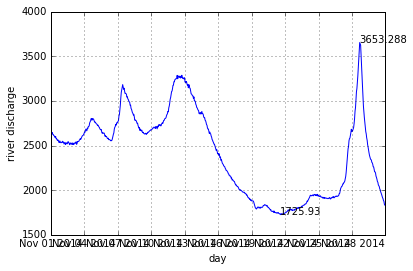

In [37]:
## Nov, 2014
ax = plot_fraser_month(flow, time, 2014, 11)

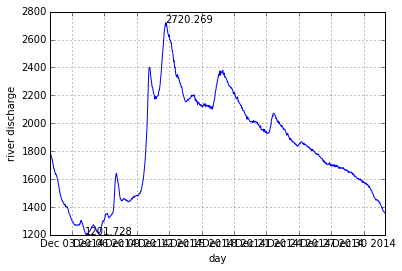

In [38]:
## Dec, 2014
ax = plot_fraser_month(flow, time, 2014, 12)

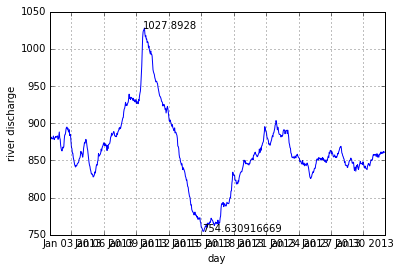

In [39]:
## Jan, 2013
ax = plot_fraser_month(flow, time, 2013, 1)

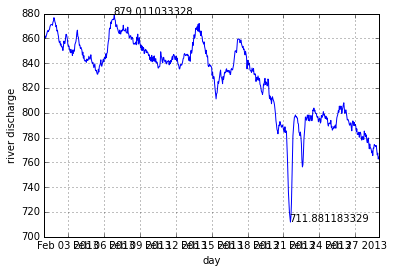

In [40]:
## Feb, 2013
ax = plot_fraser_month(flow, time, 2013, 2)

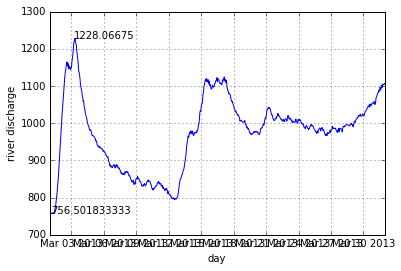

In [41]:
## Mar, 2013
ax = plot_fraser_month(flow, time, 2013, 3)

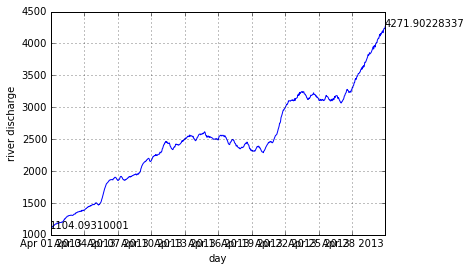

In [42]:
## Apr, 2013
ax = plot_fraser_month(flow, time, 2013, 4)

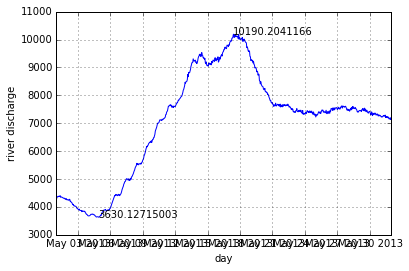

In [43]:
## May, 2013
ax = plot_fraser_month(flow, time, 2013, 5)

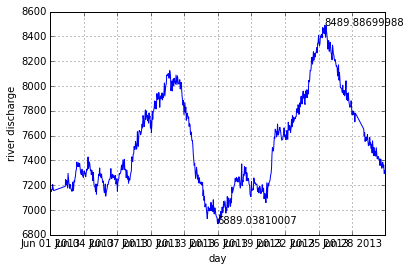

In [44]:
## Jun, 2013
ax = plot_fraser_month(flow, time, 2013, 6)

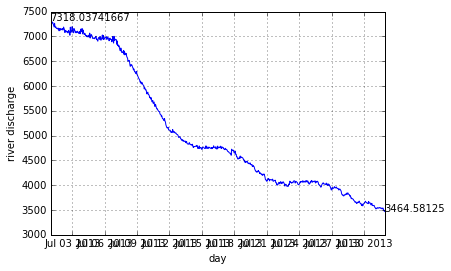

In [45]:
## Jul, 2013
ax = plot_fraser_month(flow, time, 2013, 7)

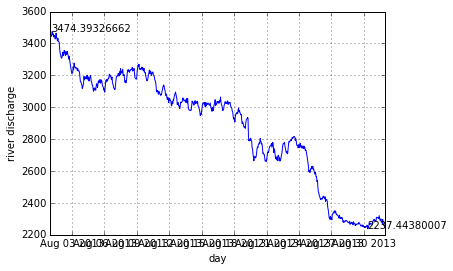

In [46]:
## Aug, 2013
ax = plot_fraser_month(flow, time, 2013, 8)

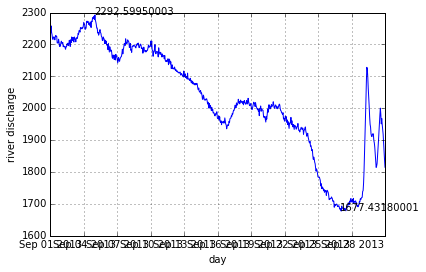

In [47]:
## Sep, 2013
ax = plot_fraser_month(flow, time, 2013, 9)

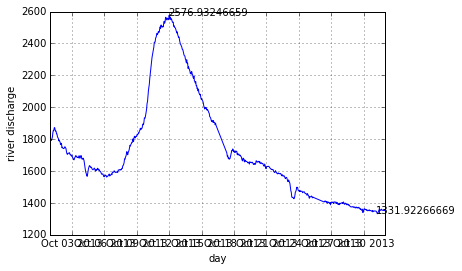

In [48]:
## Oct, 2013
ax = plot_fraser_month(flow, time, 2013, 10)

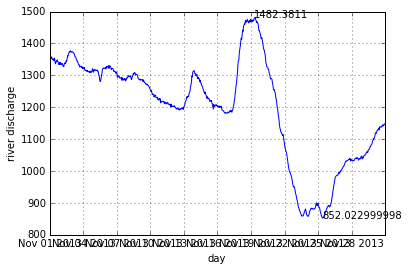

In [49]:
## Nov, 2013
ax = plot_fraser_month(flow, time, 2013, 11)

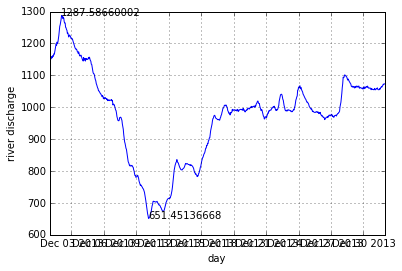

In [50]:
## Dec, 2013
ax = plot_fraser_month(flow, time, 2013, 12)

# Only look at year 2014 (with nowcasts)

In [32]:
## flag = 2, only include year 2014
sog_data = select_cast_cSog(2,240, 350, 390, 440)
sog_2014 = pd.DataFrame(sog_data)

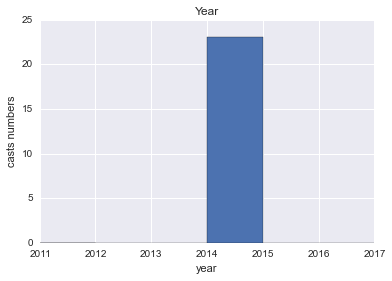

In [33]:
max_year = sog_2014['Year'].max()
min_year = sog_2014['Year'].min()
sog_2014.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

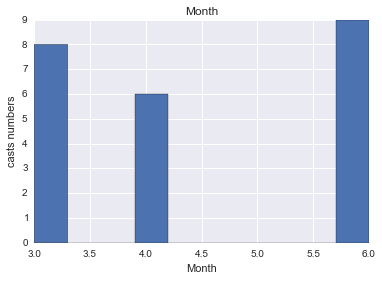

In [34]:
sog_2014.hist('Month')
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

In [35]:
## how many casts do 2014 year have?-23,are distributed in Mar,
# Apr, and June. No data after Oct, in this case, I could just
# compare data in 2014 with model results in 2015
s_cast = select_cast_cSog(2, 240, 350, 390, 440)
ss_cast = select_cast_contimonth(s_cast, 3)

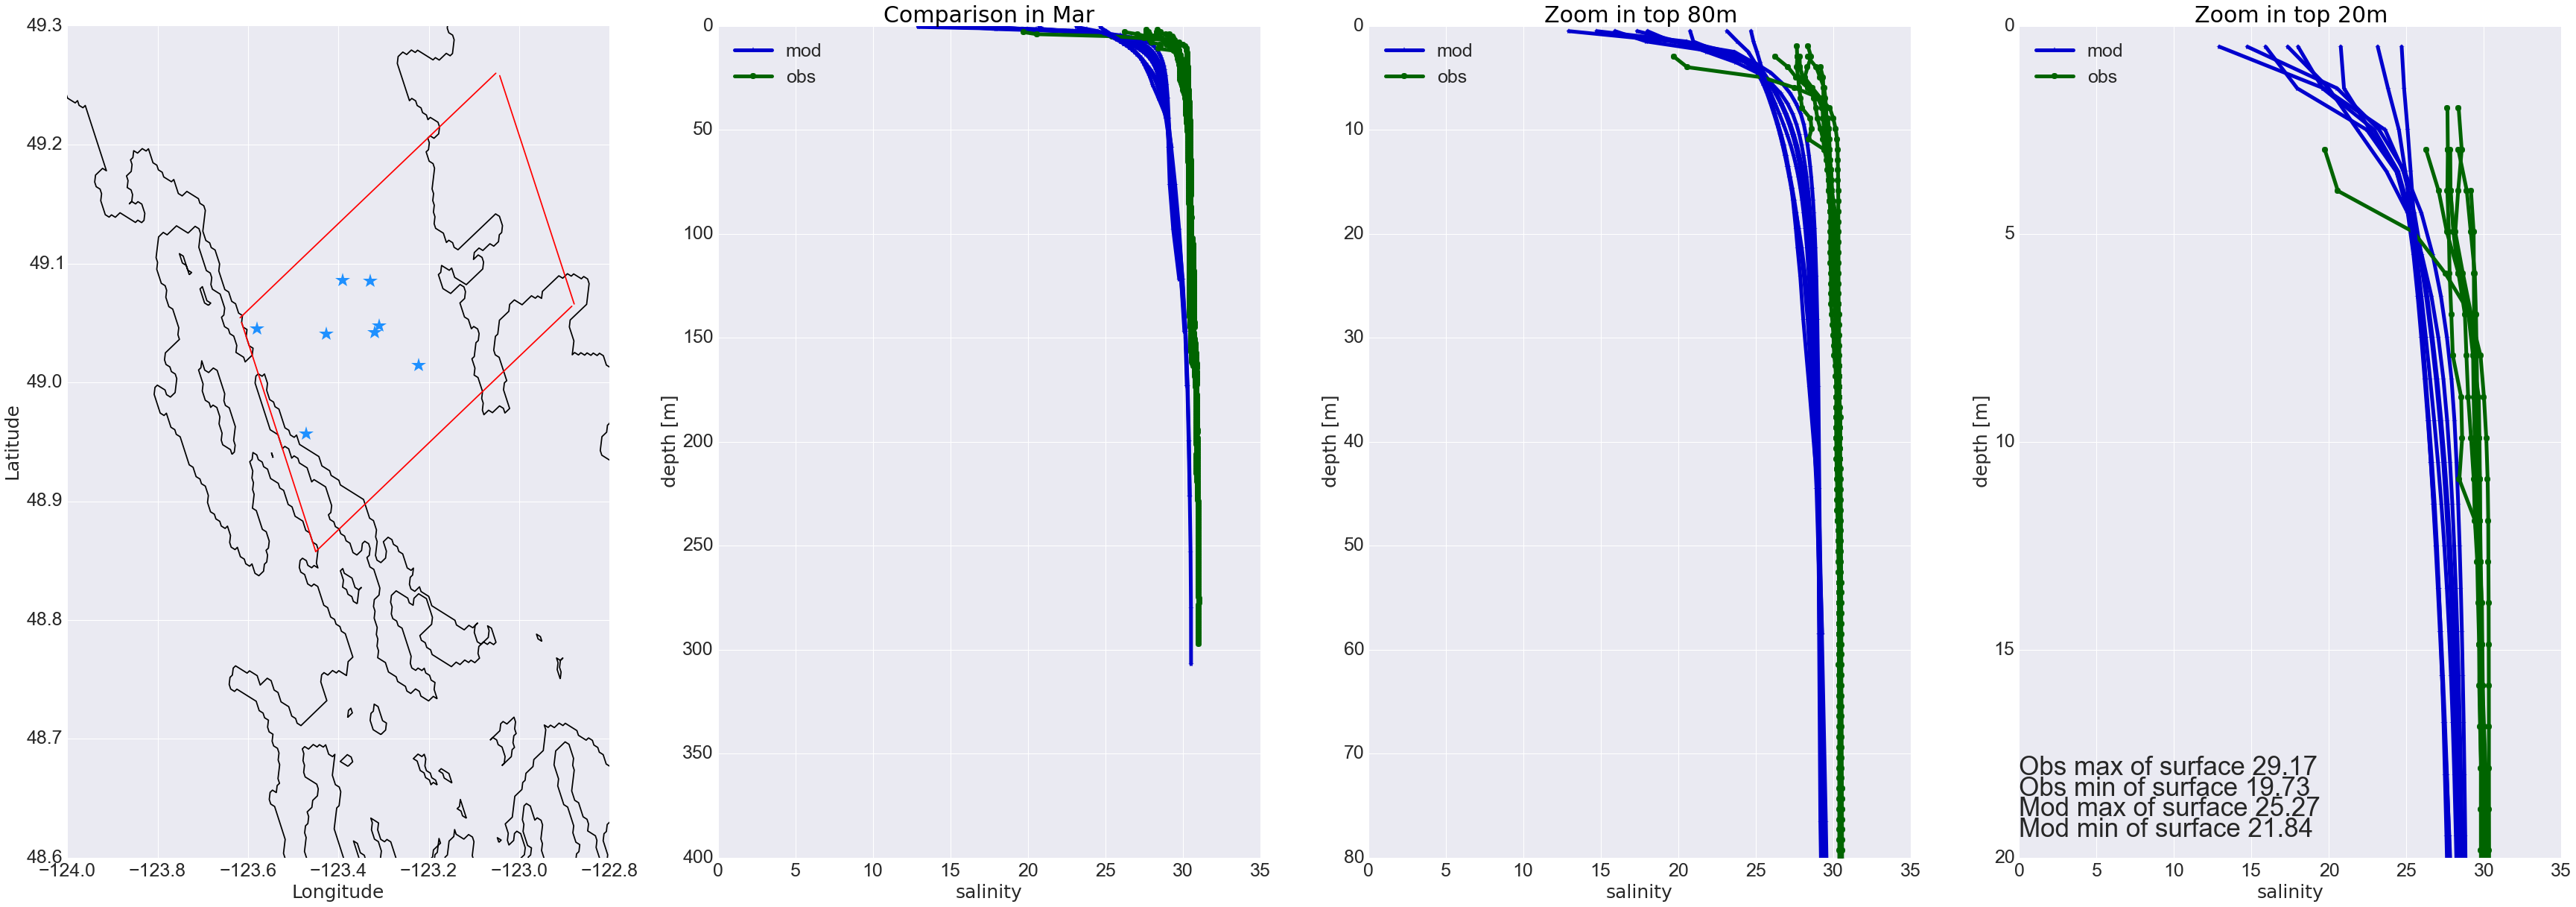

In [36]:
## Mar, 2014
fig = compare_cast_SoG_zoomin_more(sog_2014, 3, 2, 240, 350, 390, 440,'3')

* Surface depths ranges [2m, 5m]. Discharge in 2014 ranges [634, 1214], in 2015 ranges [1500, 5000]. Much higher volumn than 2014. Our model is 4 psu fresher maybe caused by high river discharge??? From surface to bottom, model is fresher.

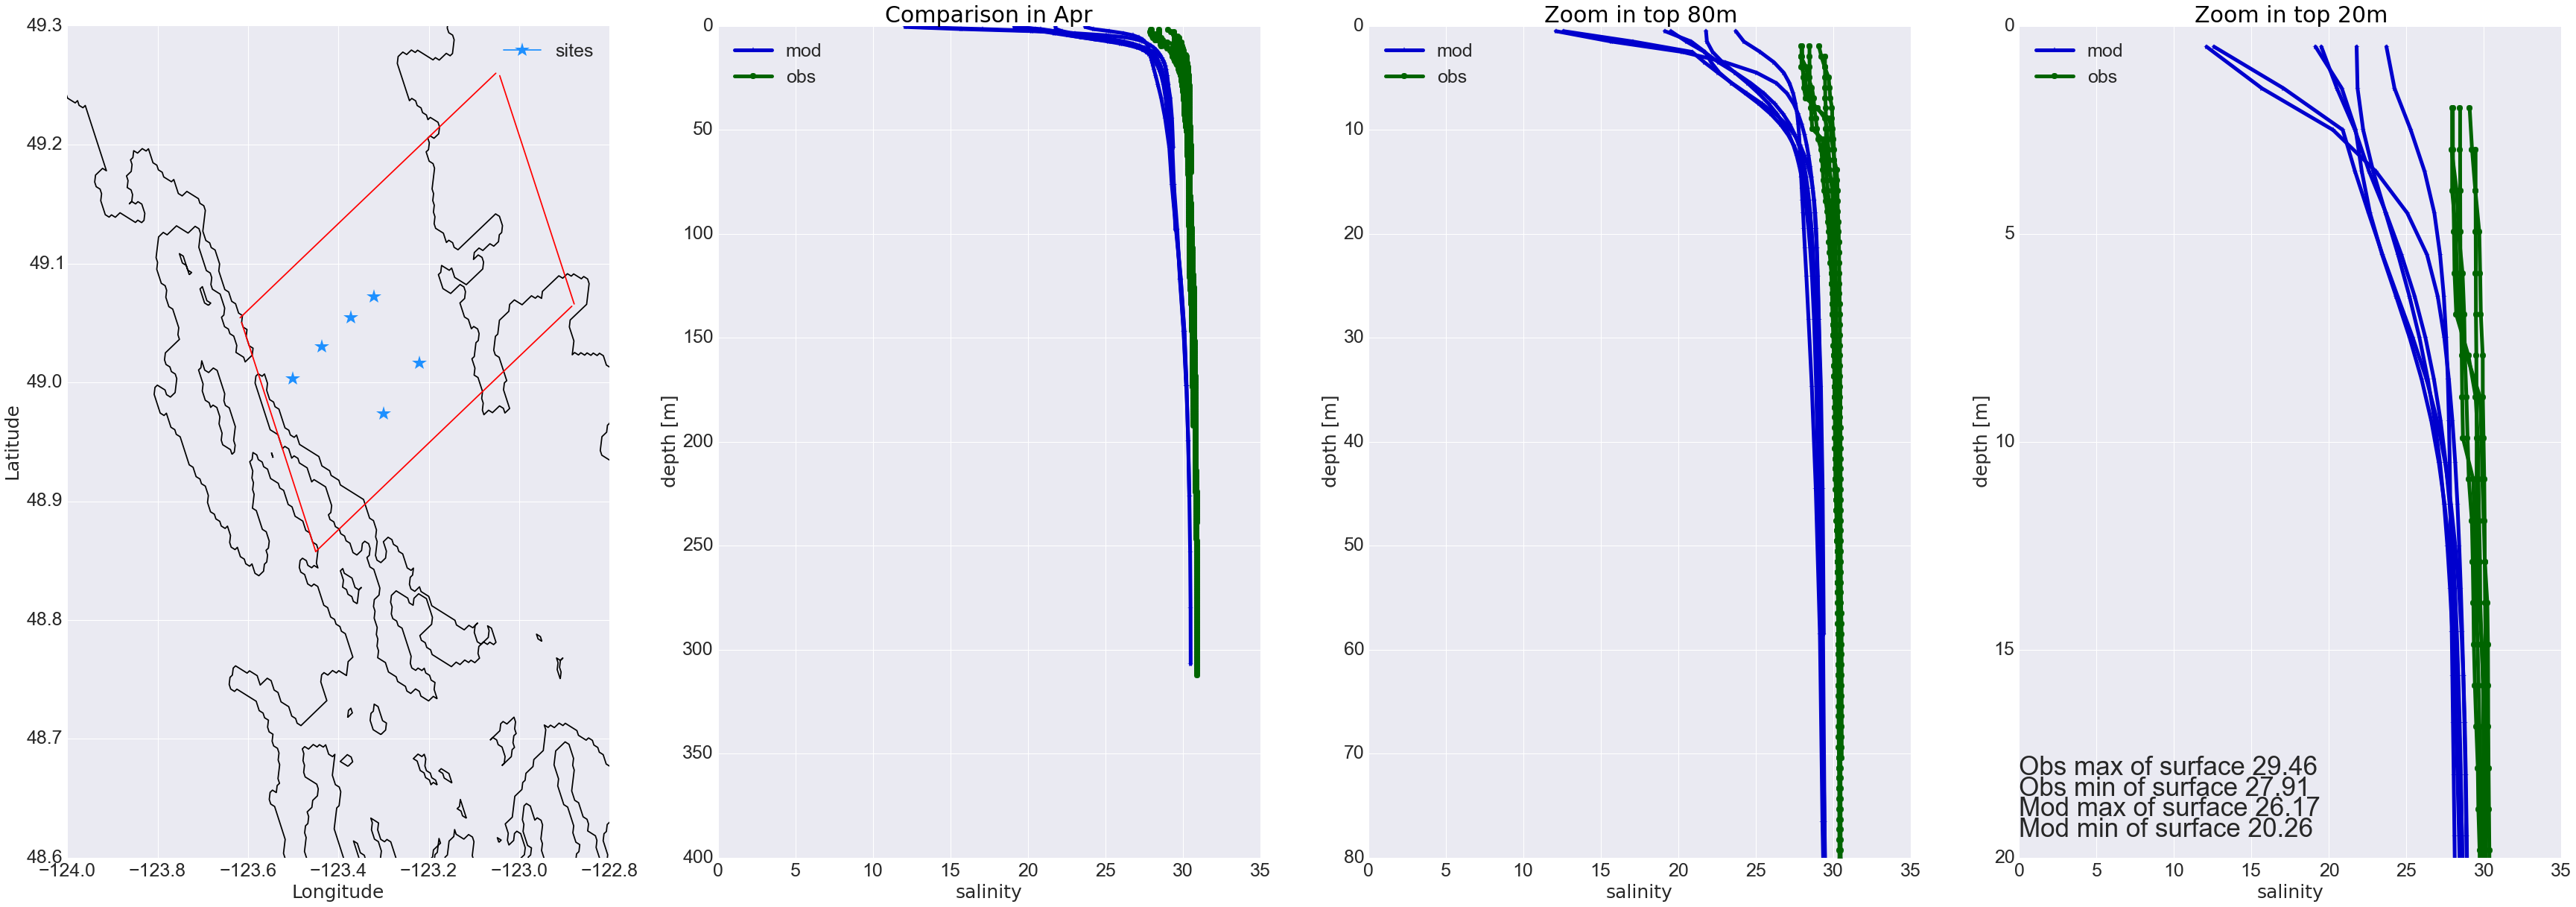

In [37]:
## Apr, 2014
fig = compare_cast_SoG_zoomin_more(sog_2014, 4, 2, 240, 350, 390, 440,'4')

* Surface depths ranges [2m, 3m]. Discharge in 2014 ranges [747, 3653], in 2015 ranges [3000, 5200]. much higher than 2014, our model is 3-7 psu fresher than obs at surface. 2014 and 2015 year are total different years for Fraser Rive discharge distribution in month. So maybe this is not a good comparison.

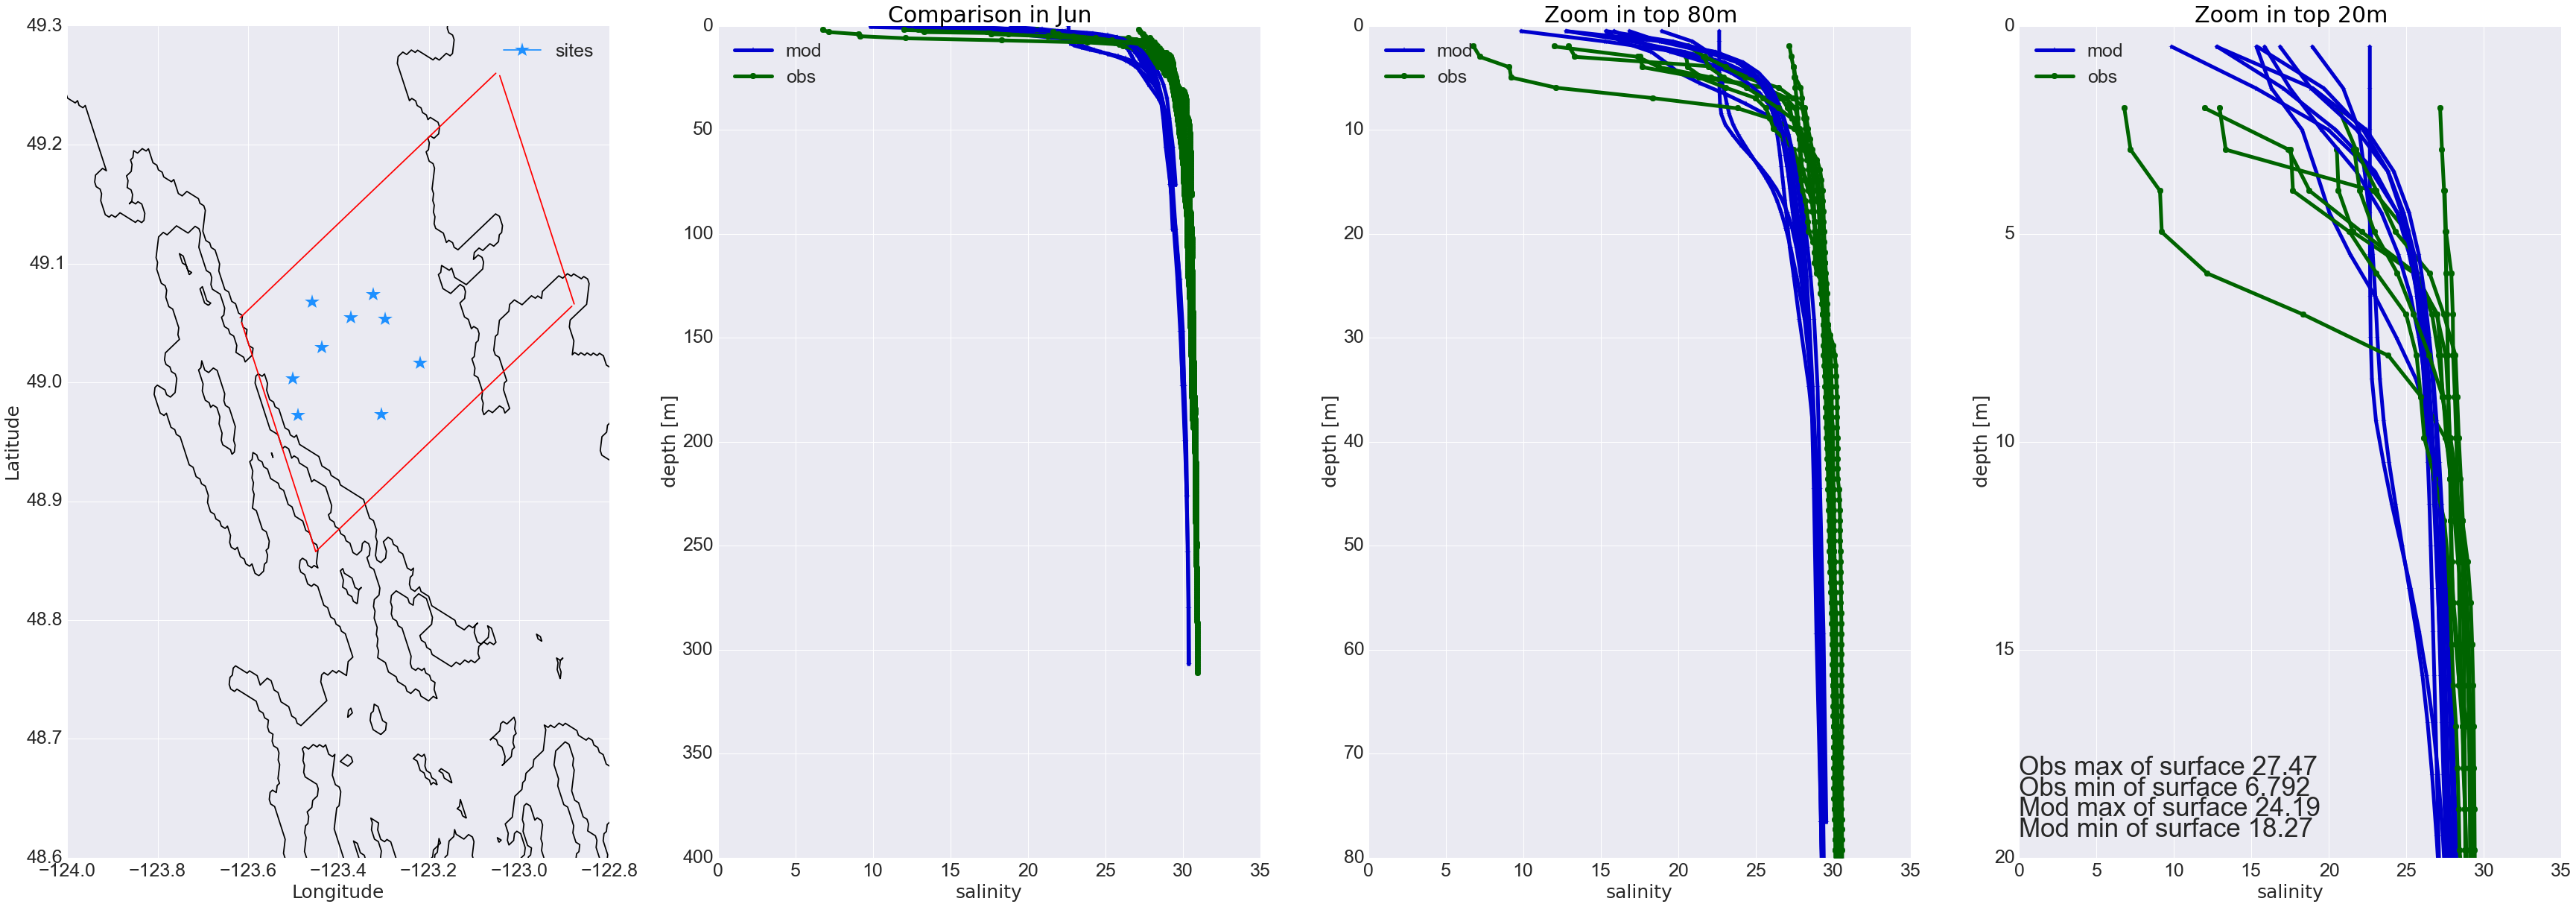

In [38]:
## Jun, 2014
fig = compare_cast_SoG_zoomin_more(sog_2014, 6, 2, 240, 350, 390, 440,'6')

*  Surface depths ranges [2m, 3m], discharge in June, 2014 ranges [6397, 9091], in 2015 it ranges [4500, 8000], I assume it is similar discharge. In top 5m, the model and obs corresponds, below 5m, model is fresher.

* My thought was to compare IOS data in 2014 with model nowcasts in 2014 in the plume area. But unfortunately, we don't have IOS data in Oct, Nov and Dec. So I compare the data with model nowcasts in 2015 instead, but end up with poor comparison as 2014 and 2015 year are total different in river discharge distribution by month. Next, think about comparing IOS data with spin-up year results rather than nowcasts. 

# Comparison with spin-up year results

In [21]:
import sys
sys.path.append('/ocean/jieliu/research/meopar/analysis/Nancy/strat/comparisons/')

In [22]:
import comparisons

In [23]:
paths = {'nowcast': '/data/dlatorne/MEOPAR/SalishSea/nowcast/',
        'spinup': '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/'}

In [24]:
data = pd.DataFrame(ACTDR.CTD_DAT)
lon_min=-123.5; lat_min=49.;
lon_max=-123; lat_max=49.1;
zmax = 20
data_region = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

In [25]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc')

(49.0, 49.1)

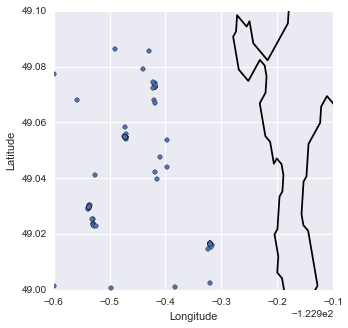

In [26]:
fig,axm = plt.subplots(1,figsize=(5,5))
data_region.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid,coords='map')
axm.set_xlim([lon_min,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4bda33bd0>]], dtype=object)

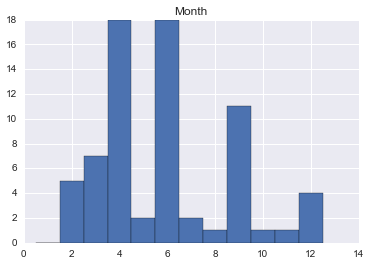

In [27]:
data_region.hist('Month',bins=np.arange(0.5,13.5))

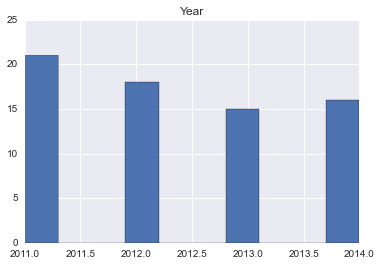

In [28]:
data_region.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

November

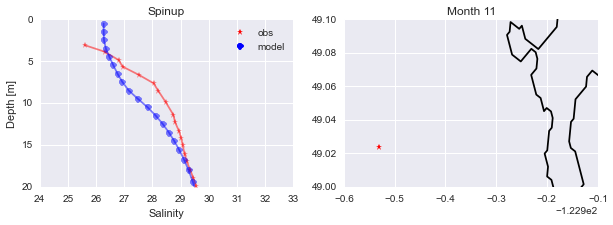

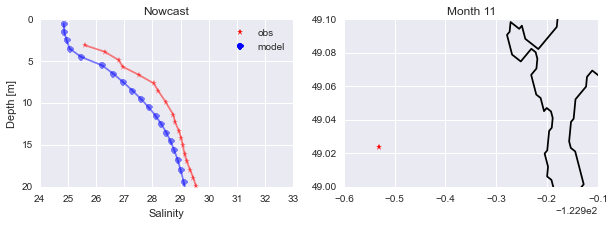

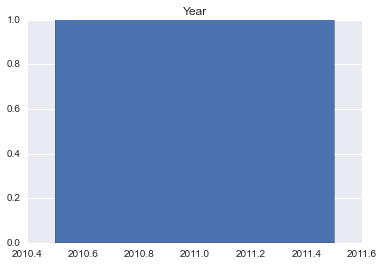

In [29]:
month=11
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2014,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* Error in December, fix that later

* no data in January

Febuary

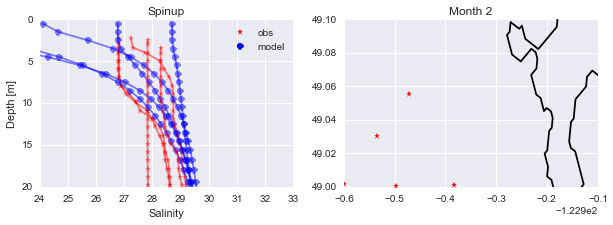

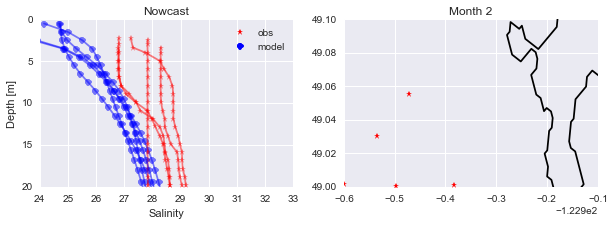

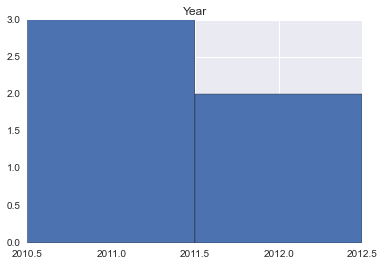

In [30]:
month=2
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

March

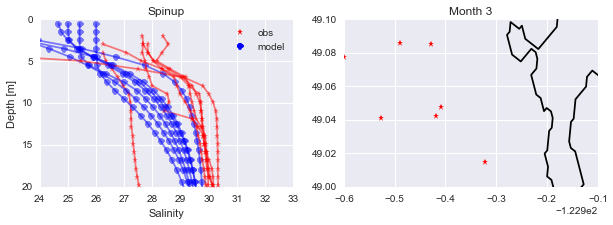

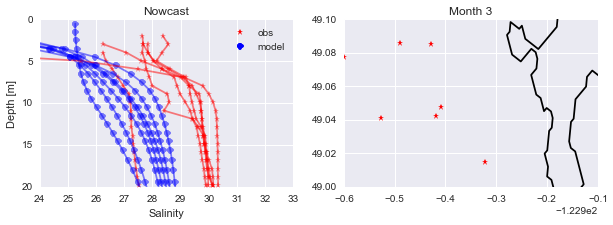

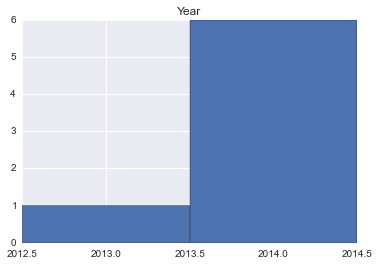

In [31]:
month=3
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

April

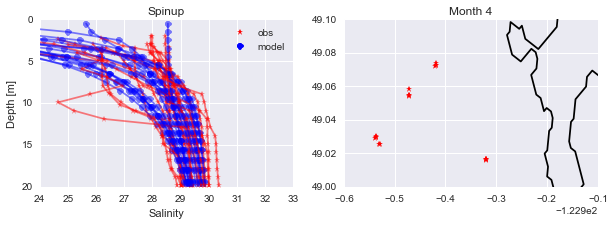

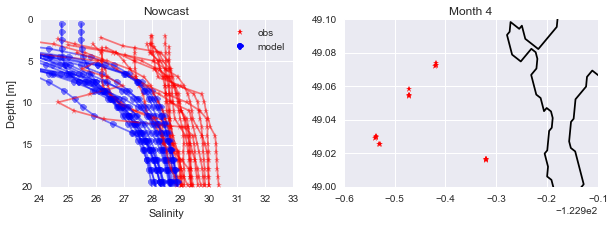

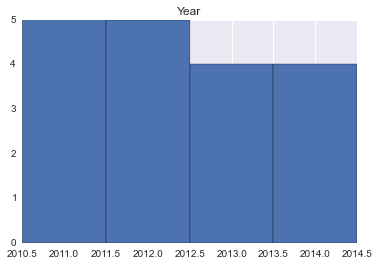

In [32]:
month=4
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

May

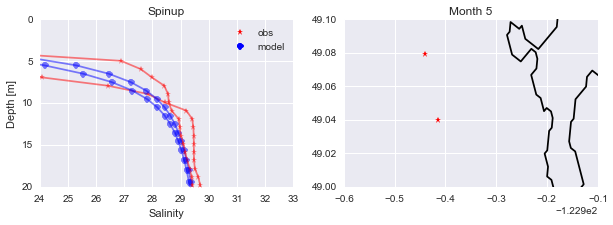

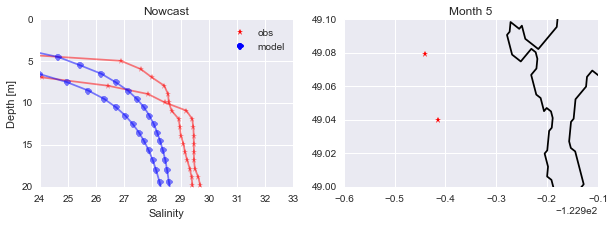

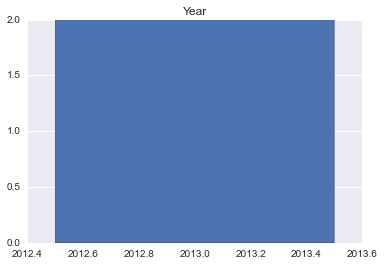

In [33]:
month=5
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

June

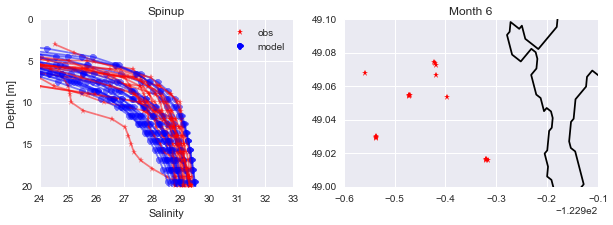

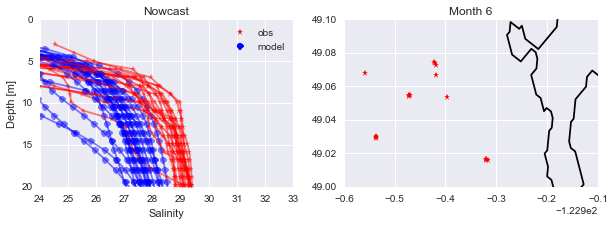

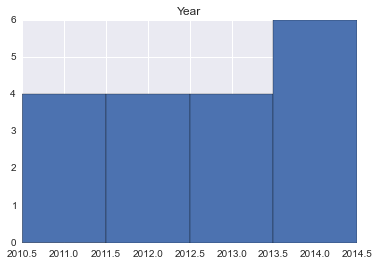

In [34]:
month=6
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

July

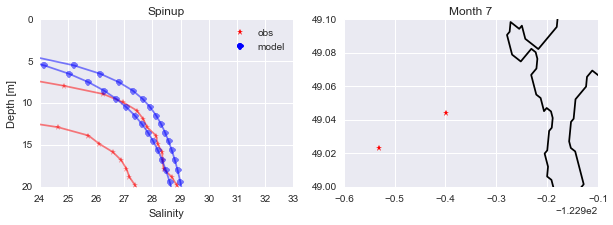

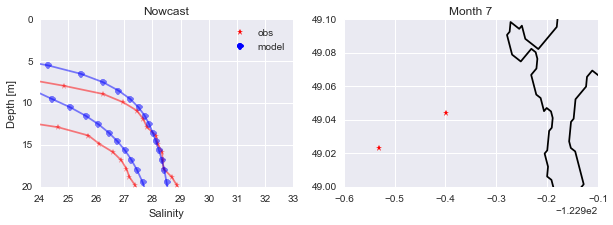

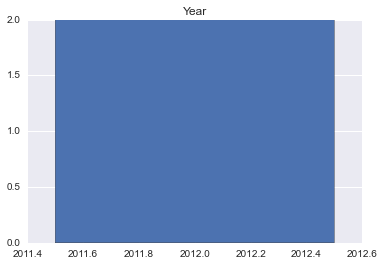

In [35]:
month=7
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

August

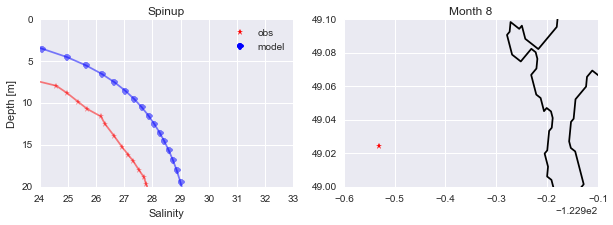

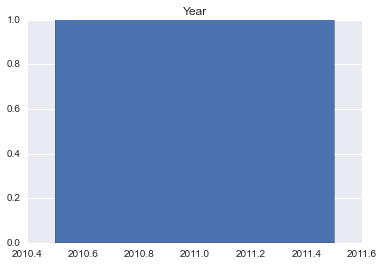

In [36]:
month=8
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

September

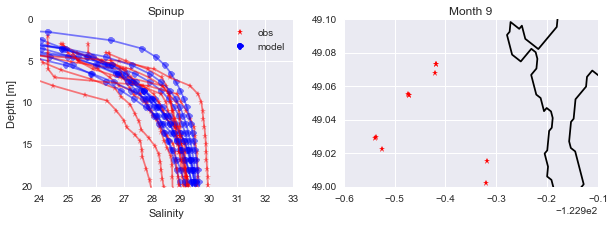

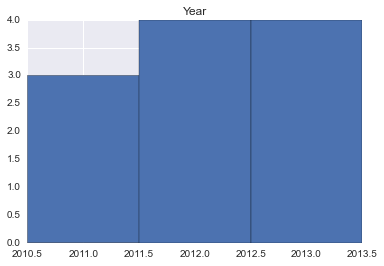

In [37]:
month=9
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

October

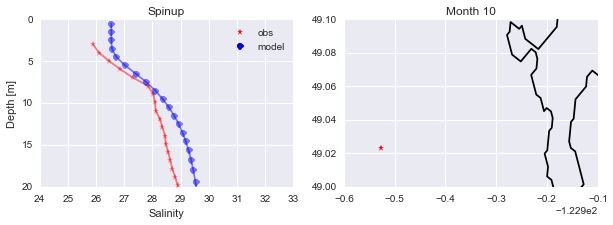

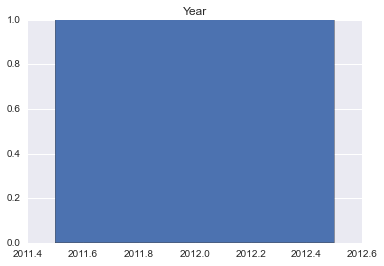

In [38]:
month=10
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region,paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year',bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* Overall, data corresponds much better with spin-up year results. For nowcasts, they are generally fresher than data.  

# Comparisons with data from 1996 to 2014

In [39]:
b = ACTDR.load_dat('/ocean/jieliu/research/meopar/river-discharge/NewWayOfIOSFrom1996To2014/SOG_1996.dat')

> open  /ocean/jieliu/research/meopar/river-discharge/NewWayOfIOSFrom1996To2014/SOG_1996.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  /ocean/jieliu/research/meopar/river-discharge/NewWayOfIOSFrom1996To2014/SOG_1996.dat
> complete


In [40]:
len(ACTDR.CTD_DAT)

3942

In [41]:
data = pd.DataFrame(ACTDR.CTD_DAT)
lon_min=-123.5; lat_min=49.;
lon_max=-123; lat_max=49.1;
zmax = 20
data_region = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4c09b9810>]], dtype=object)

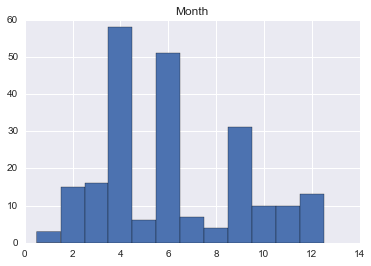

In [42]:
data_region.hist('Month',bins=np.arange(0.5,13.5))

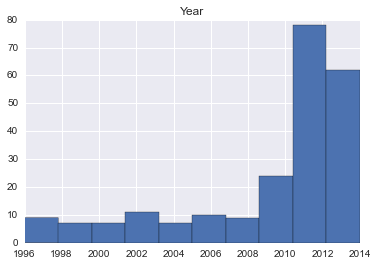

In [43]:
data_region.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* November

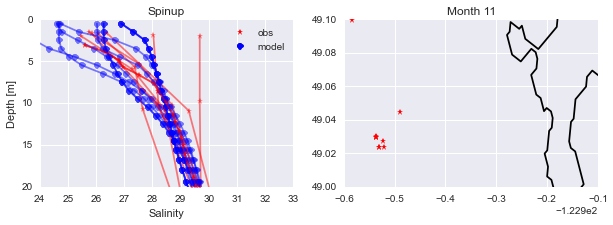

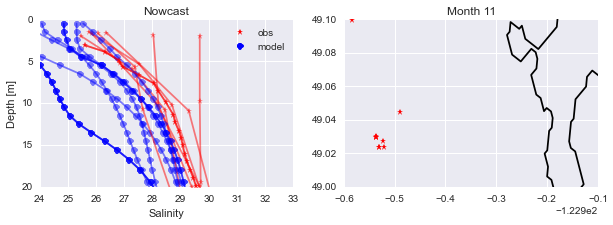

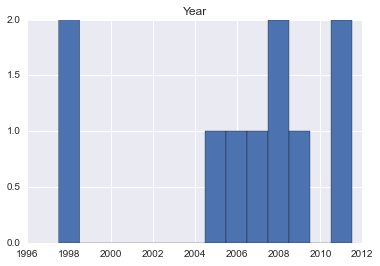

In [44]:
month=11
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2014,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* January

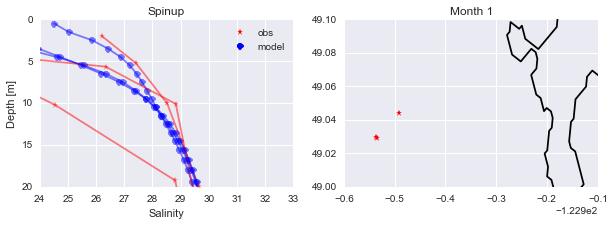

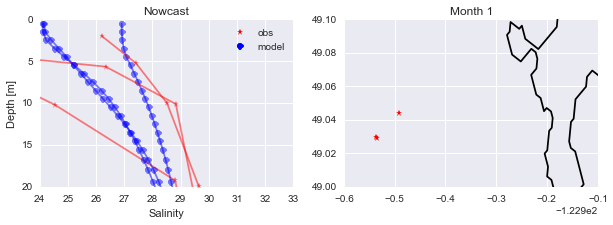

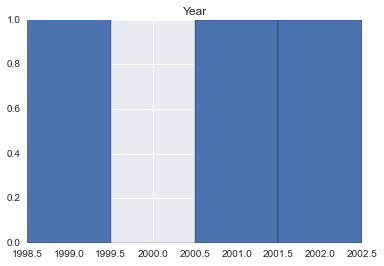

In [46]:
month=1
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* Feburary

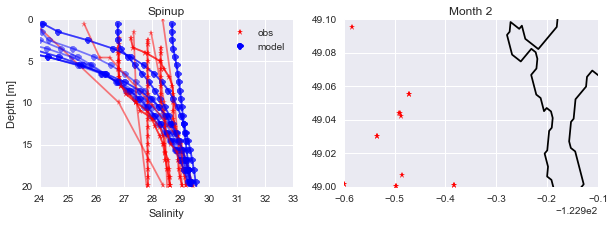

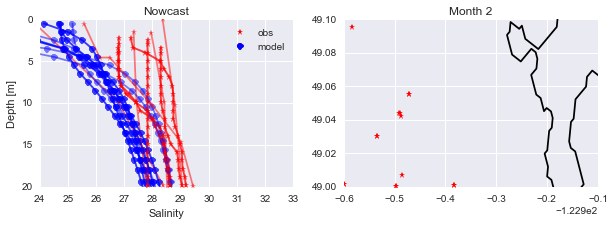

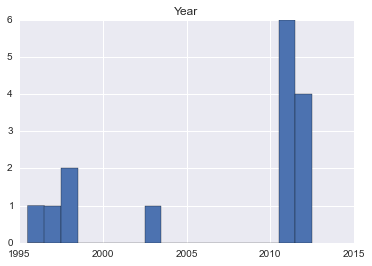

In [47]:
month=2
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* March

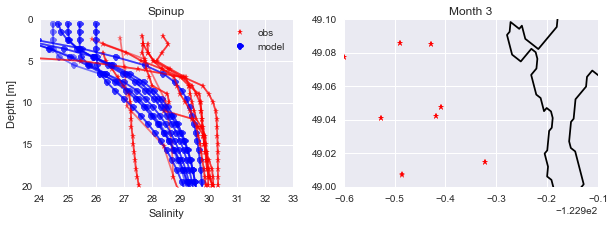

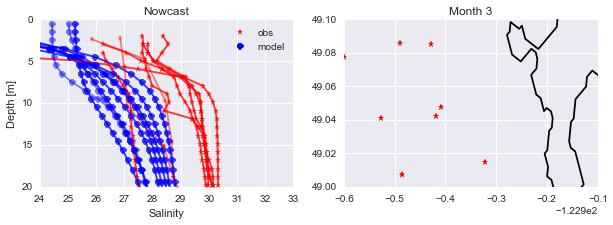

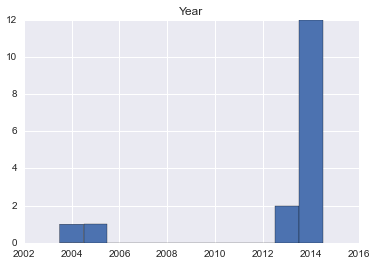

In [48]:
month=3
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* April

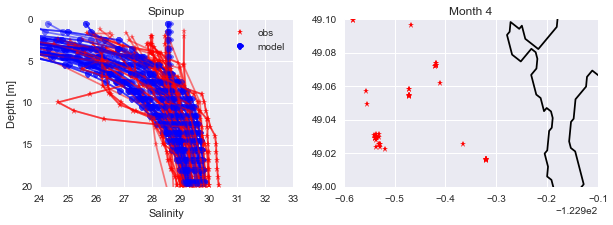

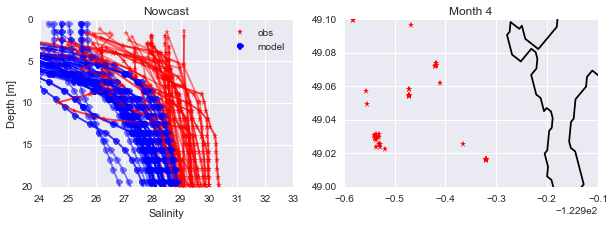

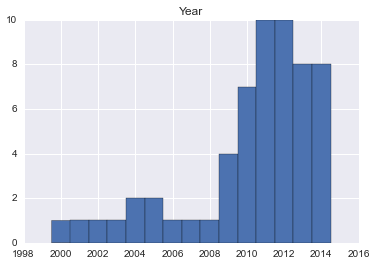

In [49]:
month=4
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* May

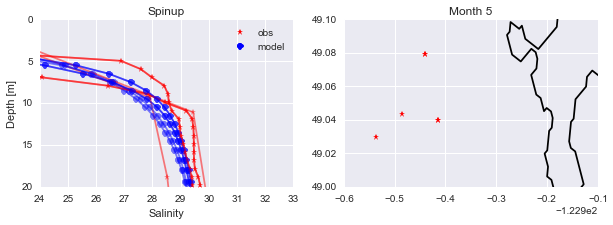

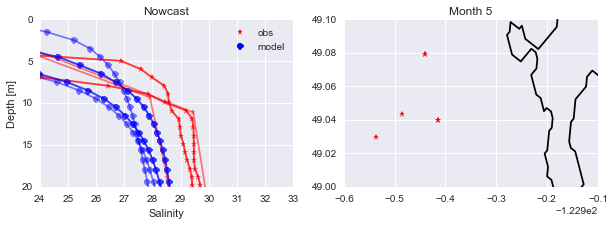

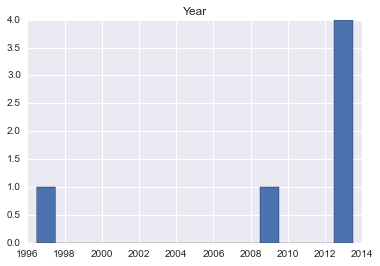

In [50]:
month=5
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* June

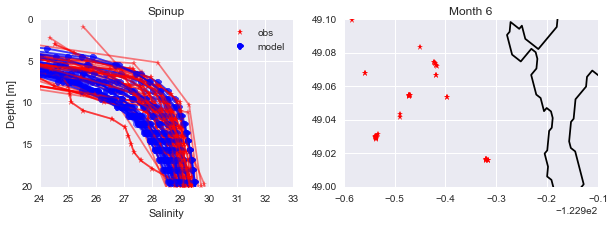

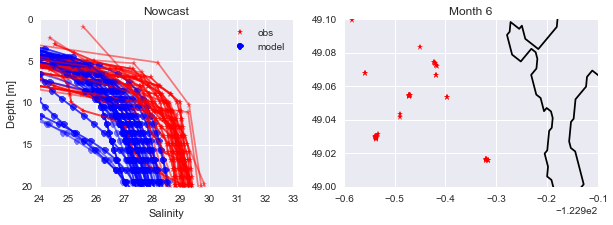

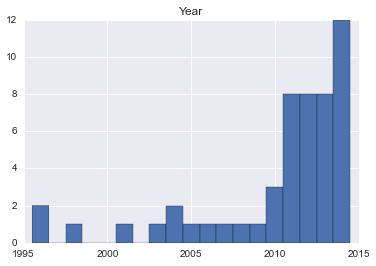

In [51]:
month=6
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* July

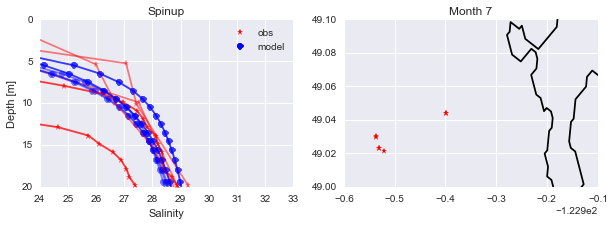

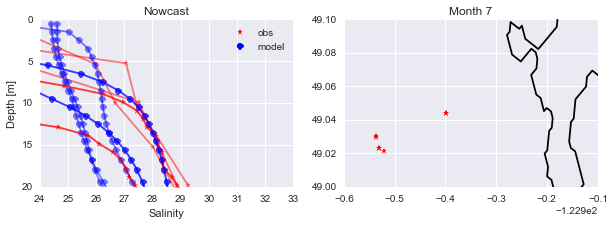

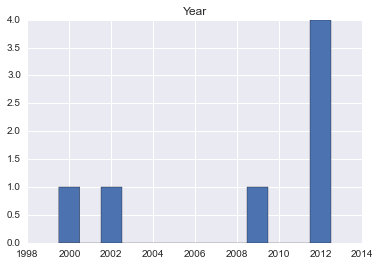

In [52]:
month=7
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* August

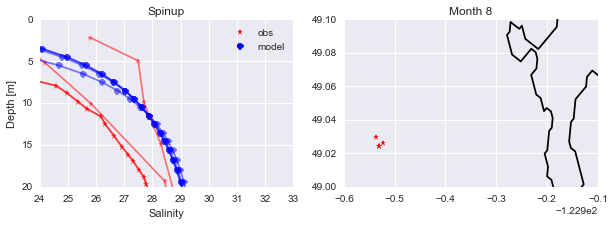

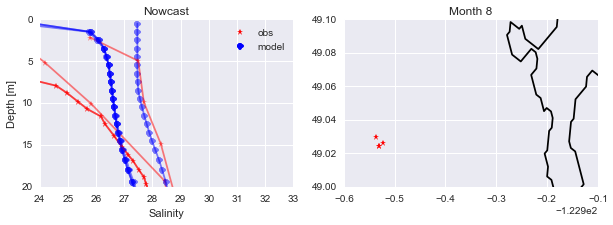

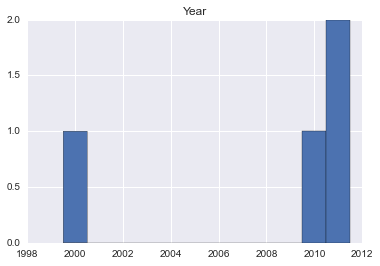

In [53]:
month=8
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_region, paths['spinup'],zmax=zmax,vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax, vmin=24,vmax=33,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)
data_month=data_region[data_region['Month']==month]
data_month.hist('Year', bins = np.arange(data_month['Year'].min()-0.5,data_month['Year'].max()+1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

* Error in September